In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

Disk_200 = Table.read("/home/douglas/Chervin/DiskActions_200.fits", format = 'fits')
Disk_400 = Table.read("/home/douglas/Chervin/DiskActions_400.fits", format = 'fits')
Disk_600 = Table.read("/home/douglas/Chervin/DiskActions_600.fits", format = 'fits')
Disk_690 = Table.read("/home/douglas/Chervin/DiskActions_690.fits", format = 'fits')

In [2]:
Jrdisk_200 = Disk_200["Jr"]
Jphidisk_200 = Disk_200["Jphi"]
Jzdisk_200 = Disk_200["Jz"]
Ordisk_200 = Disk_200["Freq_r"]
Ophidisk_200 = Disk_200["Freq_phi"]
Ozdisk_200 = Disk_200["Freq_z"]
Trdisk_200 = Disk_200["Theta_r"]
Tphidisk_200 = Disk_200["Theta_phi"]
Tzdisk_200 = Disk_200["Theta_z"]

Jrdisk_400 = Disk_400["Jr"]
Jphidisk_400 = Disk_400["Jphi"]
Jzdisk_400 = Disk_400["Jz"]
Ordisk_400 = Disk_400["Freq_r"]
Ophidisk_400 = Disk_400["Freq_phi"]
Ozdisk_400 = Disk_400["Freq_z"]
Trdisk_400 = Disk_400["Theta_r"]
Tphidisk_400 = Disk_400["Theta_phi"]
Tzdisk_400 = Disk_400["Theta_z"]

Jrdisk_600 = Disk_600["Jr"]
Jphidisk_600 = Disk_600["Jphi"]
Jzdisk_600 = Disk_600["Jz"]
Ordisk_600 = Disk_600["Freq_r"]
Ophidisk_600 = Disk_600["Freq_phi"]
Ozdisk_600 = Disk_600["Freq_z"]
Trdisk_600 = Disk_600["Theta_r"]
Tphidisk_600 = Disk_600["Theta_phi"]
Tzdisk_600 = Disk_600["Theta_z"]

Jrdisk_690 = Disk_690["Jr"]
Jphidisk_690 = Disk_690["Jphi"]
Jzdisk_690 = Disk_690["Jz"]
Ordisk_690 = Disk_690["Freq_r"]
Ophidisk_690 = Disk_690["Freq_phi"]
Ozdisk_690 = Disk_690["Freq_z"]
Trdisk_690 = Disk_690["Theta_r"]
Tphidisk_690 = Disk_690["Theta_phi"]
Tzdisk_690 = Disk_690["Theta_z"]

In [3]:
Diskphspace_200 = Table.read("/home/douglas/Chervin/PhaseSpaceDisk_200.fits", format = 'fits')
Diskphspace_400 = Table.read("/home/douglas/Chervin/PhaseSpaceDisk_400.fits", format = 'fits')
Diskphspace_600 = Table.read("/home/douglas/Chervin/PhaseSpaceDisk_600.fits", format = 'fits')
Diskphspace_690 = Table.read("/home/douglas/Chervin/PhaseSpaceDisk_690.fits", format = 'fits')

In [4]:
Xdisk_200 = Diskphspace_200["X"]
Ydisk_200 = Diskphspace_200["Y"]
Zdisk_200 = Diskphspace_200["Z"]
Udisk_200 = Diskphspace_200["U"]
Vdisk_200 = Diskphspace_200["V"]
Wdisk_200 = Diskphspace_200["W"]

Xdisk_400 = Diskphspace_400["X"]
Ydisk_400 = Diskphspace_400["Y"]
Zdisk_400 = Diskphspace_400["Z"]
Udisk_400 = Diskphspace_400["U"]
Vdisk_400 = Diskphspace_400["V"]
Wdisk_400 = Diskphspace_400["W"]

Xdisk_600 = Diskphspace_600["X"]
Ydisk_600 = Diskphspace_600["Y"]
Zdisk_600 = Diskphspace_600["Z"]
Udisk_600 = Diskphspace_600["U"]
Vdisk_600 = Diskphspace_600["V"]
Wdisk_600 = Diskphspace_600["W"]

Xdisk_690 = Diskphspace_690["X"]
Ydisk_690 = Diskphspace_690["Y"]
Zdisk_690 = Diskphspace_690["Z"]
Udisk_690 = Diskphspace_690["U"]
Vdisk_690 = Diskphspace_690["V"]
Wdisk_690 = Diskphspace_690["W"]

In [5]:
import numpy as np
import os
import sys
import math

# ----- class for snapshot header ----- 

class snapshot_header:
    def __init__(self, filename):
        if (not os.path.exists(filename)):
            print("file not found:", filename)
            sys.exit()
      
        self.filename = filename  
        f = open(filename,'rb')    
        blocksize = np.fromfile(f,dtype=np.int32,count=1)
        if blocksize[0] == 8:
            swap = 0
            format = 2
        elif blocksize[0] == 256:
            swap = 0
            format = 1  
        else:
            blocksize.byteswap(True)
            if blocksize[0] == 8:
                swap = 1
                format = 2
            elif blocksize[0] == 256:
                swap = 1
                format = 1
            else:
                print("incorrect file format encountered when reading header of", filename)
                sys.exit()
    
        self.format = format
        self.swap = swap
    
        if format==2:
            f.seek(16, os.SEEK_CUR)
    
        self.npart = np.fromfile(f,dtype=np.int32,count=6)
        self.massarr = np.fromfile(f,dtype=np.float64,count=6)
        self.time = (np.fromfile(f,dtype=np.float64,count=1))[0]
        self.redshift = (np.fromfile(f,dtype=np.float64,count=1))[0]
        self.sfr = (np.fromfile(f,dtype=np.int32,count=1))[0]
        self.feedback = (np.fromfile(f,dtype=np.int32,count=1))[0]
        self.nall = np.fromfile(f,dtype=np.int32,count=6)
        self.cooling = (np.fromfile(f,dtype=np.int32,count=1))[0]
        self.filenum = (np.fromfile(f,dtype=np.int32,count=1))[0]
        self.boxsize = (np.fromfile(f,dtype=np.float64,count=1))[0]
        self.omega_m = (np.fromfile(f,dtype=np.float64,count=1))[0]
        self.omega_l = (np.fromfile(f,dtype=np.float64,count=1))[0]
        self.hubble = (np.fromfile(f,dtype=np.float64,count=1))[0]
    
        if swap:
            self.npart.byteswap(True)
            self.massarr.byteswap(True)
            self.time = self.time.byteswap()
            self.redshift = self.redshift.byteswap()
            self.sfr = self.sfr.byteswap()
            self.feedback = self.feedback.byteswap()
            self.nall.byteswap(True)
            self.cooling = self.cooling.byteswap()
            self.filenum = self.filenum.byteswap()
            self.boxsize = self.boxsize.byteswap()
            self.omega_m = self.omega_m.byteswap()
            self.omega_l = self.omega_l.byteswap()
            self.hubble = self.hubble.byteswap()
     
        f.close()
 


#----- find offset and size of data block ----- 

def find_block(filename, format, swap, block, block_num, only_list_blocks=False):
    if (not os.path.exists(filename)):
        print("file not found:", filename)
        sys.exit()
            
    f = open(filename,'rb')
    f.seek(0, os.SEEK_END)
    filesize = f.tell()
    f.seek(0, os.SEEK_SET)
  
    found = False
    curblock_num = 1
    while ((not found) and (f.tell()<filesize)):
        if format==2:
            f.seek(4, os.SEEK_CUR)
            curblock = f.read(4)
            if (block == curblock):
                found = True
            f.seek(8, os.SEEK_CUR)  
        else:
            if curblock_num==block_num:
                found = True
        
        curblocksize = (np.fromfile(f,dtype=np.int32,count=1))[0]
        if swap:
            curblocksize = curblocksize.byteswap()
    
    # - print some debug info about found data blocks -
    #if format==2:
    #  print curblock, curblock_num, curblocksize
    #else:
    #  print curblock_num, curblocksize
    
        if only_list_blocks:
            print(curblock_num,curblock,f.tell(),curblocksize)
            found = False
    
        if found:
            blocksize = curblocksize
            offset = f.tell()
        else:
            f.seek(curblocksize, os.SEEK_CUR)
            blocksize_check = (np.fromfile(f,dtype=np.int32,count=1))[0]
            if swap: blocksize_check = blocksize_check.byteswap()
            if (curblocksize != blocksize_check):
                print("something wrong")
                sys.exit()
            curblock_num += 1
      
    f.close()
      
    if ((not found) and (not only_list_blocks)):
        print("Error: block not found")
        sys.exit()
    
    if (not only_list_blocks):
        return offset,blocksize
 
# ----- read data block -----
 
def read_block(filename, block, parttype=-1, physical_velocities=True, arepo=0, no_masses=False, verbose=False):
    if (verbose):
	    print("reading block", block)
  
    blockadd=0
    blocksub=0
  
    if arepo==0:
        if (verbose):	
	        print("Gadget format")
        blockadd=0
    if arepo==1:
        if (verbose):	
	        print("Arepo format")
        blockadd=1	
    if arepo==2:
        if (verbose):
	        print("Arepo extended format")
        blockadd=4	
    if no_masses==True:
        if (verbose):	
	        print("No mass block present")    
        blocksub=1
		 
    if parttype not in [-1,0,1,2,3,4,5]:
        print("wrong parttype given")
        sys.exit()
  
    if os.path.exists(filename):
        curfilename = filename
    elif os.path.exists(filename+".0"):
        curfilename = filename+".0"
    else:
        print("file not found:", filename)
        print("and:", curfilename)
        sys.exit()
  
    head = snapshot_header(curfilename)
    format = head.format
    swap = head.swap
    npart = head.npart
    massarr = head.massarr
    nall = head.nall
    filenum = head.filenum
    redshift = head.redshift
    time = head.time
    del head
  
  # - description of data blocks -
  # add or change blocks as needed for your Gadget version
    data_for_type = np.zeros(6,bool) # should be set to "True" below for the species for which data is stored in the data block
    dt = np.float32 # data type of the data in the block
    if block=="POS ":
        data_for_type[:] = True
        dt = np.dtype((np.float32,3))
        block_num = 2
    elif block=="VEL ":
        data_for_type[:] = True
        dt = np.dtype((np.float32,3))
        block_num = 3
    elif block=="ID  ":
        data_for_type[:] = True
        dt = np.uint32
        block_num = 4
    elif block=="MASS":
        data_for_type[np.where(massarr==0)] = True
        block_num = 5
        if parttype>=0 and massarr[parttype]>0:   
            if (verbose):	
	            print("filling masses according to massarr")   
            return np.ones(nall[parttype],dtype=dt)*massarr[parttype]
    elif block=="U   ":
        data_for_type[:] = True
        dt = np.dtype((np.float32))
        block_num = 6#-blocksub
    elif block=="RHO ":
        data_for_type[0] = True
        block_num = 7-blocksub
    elif block=="VOL ":
        data_for_type[0] = True
        block_num = 8-blocksub 
    elif block=="CMCE":
        data_for_type[0] = True
        dt = np.dtype((np.float32,3))
        block_num = 9-blocksub 
    elif block=="AREA":
        data_for_type[0] = True
        block_num = 10-blocksub
    elif block=="NFAC":
        data_for_type[0] = True
        dt = np.dtype(np.int32)	
        block_num = 11-blocksub
    elif block=="NE  ":
        data_for_type[0] = True
        block_num = 8+blockadd-blocksub
    elif block=="NH  ":
        data_for_type[0] = True
        block_num = 9+blockadd-blocksub
    elif block=="HSML":
        data_for_type[0] = True
        block_num = 10+blockadd-blocksub
    elif block=="SFR ":
        data_for_type[0] = True
        block_num = 11+blockadd-blocksub
    elif block=="AGE ":
        data_for_type[4] = True
        block_num = 12+blockadd-blocksub
    elif block=="Z   ":
        data_for_type[0] = True
        data_for_type[4] = True
        block_num = 13+blockadd-blocksub
    elif block=="BHMA":
        data_for_type[5] = True
        block_num = 14+blockadd-blocksub
    elif block=="BHMD":
        data_for_type[5] = True
        block_num = 15+blockadd-blocksub
    elif block=="COOR":
        data_for_type[0] = True
        block_num = -1 
    else:
        print("Sorry! Block type", block, "not known!")
        sys.exit()
  # - end of block description -

    if (block_num < 0 and format==1):
        print("Sorry! Block number of", block, "not known! Unable to read this block from format 1 file!")
        sys.exit() 
    
    actual_data_for_type = np.copy(data_for_type)  
    if parttype >= 0:
        actual_data_for_type[:] = False
        actual_data_for_type[parttype] = True
        if data_for_type[parttype]==False:
            print("Error: no data for specified particle type", parttype, "in the block", block)   
            sys.exit()
    elif block=="MASS":
        actual_data_for_type[:] = True  
    
    allpartnum = np.int64(0)
    species_offset = np.zeros(6,np.int64)
    for j in range(6):
        species_offset[j] = allpartnum
        if actual_data_for_type[j]:
            allpartnum += nall[j]
    filenum=1  
    for i in range(filenum): # main loop over files
        if filenum>1:
            curfilename = filename+"."+str(i)
      
        if i>0:
            head = snapshot_header(curfilename)
            npart = head.npart  
            del head
      
        curpartnum = np.int32(0)
        cur_species_offset = np.zeros(6,np.int64)
        for j in range(6):
            cur_species_offset[j] = curpartnum
            if data_for_type[j]:
                curpartnum += npart[j]
    
        if parttype>=0:
            actual_curpartnum = npart[parttype]      
            add_offset = cur_species_offset[parttype] 
        else:
            actual_curpartnum = curpartnum
            add_offset = np.int32(0)
      
        offset,blocksize = find_block(curfilename,format,swap,block,block_num)
    
        if i==0: # fix data type for ID if long IDs are used
            if block=="ID  ":
                if blocksize == np.dtype(dt).itemsize*curpartnum * 2:
                    dt = np.uint64 
        
        if np.dtype(dt).itemsize*curpartnum != blocksize:
            print("something wrong with blocksize! expected =",np.dtype(dt).itemsize*curpartnum,"actual =",blocksize)
            sys.exit()
    
        f = open(curfilename,'rb')
        f.seek(offset + add_offset*np.dtype(dt).itemsize, os.SEEK_CUR)  
        curdat = np.fromfile(f,dtype=dt,count=actual_curpartnum) # read data
        f.close()  
        if swap:
            curdat.byteswap(True)  
      
        if i==0:
            data = np.empty(allpartnum,dt)
    
        for j in range(6):
            if actual_data_for_type[j]:
                if block=="MASS" and massarr[j]>0: # add mass block for particles for which the mass is specified in the snapshot header
                    data[species_offset[j]:species_offset[j]+npart[j]] = massarr[j]
                else:
                    if parttype>=0:
                        data[species_offset[j]:species_offset[j]+npart[j]] = curdat
                    else:
                        data[species_offset[j]:species_offset[j]+npart[j]] = curdat[cur_species_offset[j]:cur_species_offset[j]+npart[j]]
                species_offset[j] += npart[j]

        del curdat

    if physical_velocities and block=="VEL " and redshift!=0:
        data *= math.sqrt(time)

    return data
  
# ----- list all data blocks in a format 2 snapshot file -----

def list_format2_blocks(filename):
    if (not os.path.exists(filename)):
        print("file not found:", filename)
        sys.exit()
  
    head = snapshot_header(filename)
    format = head.format
    swap = head.swap
    del head
  
    if (format != 2):
        print("not a format 2 snapshot file")
        sys.exit()
            
    print("#   BLOCK   OFFSET   SIZE")
    print("-------------------------")
  
    find_block(filename, format, swap, "XXXX", 0, only_list_blocks=True)
  
    print("-------------------------")


In [6]:
DiskIds_200 =read_block("/home/douglas/Chervin/Sagittarius Snaps/snap_200","ID  ",parttype=2)
DiskIds_400 =read_block("/home/douglas/Chervin/Sagittarius Snaps/snap_400","ID  ",parttype=2)
DiskIds_600 =read_block("/home/douglas/Chervin/Sagittarius Snaps/snap_600","ID  ",parttype=2)
DiskIds_690 =read_block("/home/douglas/Chervin/Sagittarius Snaps/snap_690","ID  ",parttype=2)

In [7]:
print(len(Jphidisk_200))
newJphidisk_200 = Jphidisk_200[np.logical_not(np.isnan(Jphidisk_200))]
print(len(newJphidisk_200))
#ichoose = np.where()

5000000
4999996


In [82]:
R = np.sqrt(Xdisk_200**2 + Ydisk_200**2)
#ichoose = np.where((R<3.005) & (R>2.98))
ichoose = np.where((Jphidisk_200<-585) & (Jphidisk_200>-615))

newX_3 = Xdisk_200[ichoose]
newY_3 = Ydisk_200[ichoose]
newZ_3 = Zdisk_200[ichoose]

newU_3 = Udisk_200[ichoose]
newV_3 = Vdisk_200[ichoose]
newW_3 = Wdisk_200[ichoose]

newJr_3 = Jrdisk_200[ichoose]
newJphi_3 = Jphidisk_200[ichoose]
newJz_3 = Jzdisk_200[ichoose]

newOr_3 = Ordisk_200[ichoose]
newOphi_3 = Ophidisk_200[ichoose]
newOz_3 = Ozdisk_200[ichoose]

newTr_3 = Trdisk_200[ichoose]
newTphi_3 = Tphidisk_200[ichoose]
newTz_3 = Tzdisk_200[ichoose]

ids_3 = DiskIds_200[ichoose]

/home/douglas/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/home/douglas/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [83]:
print(ids_3)
print(newTr_3)

[40004146 43250514 43555051 ... 41515532 41622114 43536025]
       Theta_r       
         rad         
---------------------
    2.237892463874701
   2.5841133720191314
   3.6312528515332665
    4.539192010440025
    4.101921003512431
    3.217523249591863
    4.111277364558885
    2.519554131972345
   3.2096537337785604
    1.962221826280748
                  ...
    6.173476086760858
    6.040595438939672
   6.2420661139113935
   0.3290091806671422
   6.0473958974628585
 0.030696413817647237
0.0008100378552140917
   0.2210345536246727
    2.770721385756937
    4.996160921271353
Length = 63696 rows


In [84]:
def IDmatch(ID1, ID2):

    ID1=np.array(ID1)
    ID2=np.array(ID2)
# compare two ID list ID1 and ID2
# idx_id[i] points to the index of particle in the second list or is
# equal to -1 when id on the ID2 list was not found
    idx_id= np.ndarray(shape=(len(ID1)),dtype=int) #lonarr(n_elements(ID1))
    idx_id[:] = -1
    ind1 = np.argsort(ID1)
    ind2 = np.argsort(ID2)
    s2 = 0
    s2N = len(ID2)
    break_loop=0

    for s1 in range(0, len(ind1)):
        while(ID2[ind2[s2]]<ID1[ind1[s1]]):
            s2=s2+1
            if (s2>=s2N):
                break_loop=1
                break       
        if (break_loop==1):
            break
        if (ID2[ind2[s2]]==ID1[ind1[s1]]): 
            idx_id[ind1[s1]]=ind2[s2]

    ind1 = 0
    ind2 = 0

    idx = np.where(idx_id>-1)
    idx=idx[0]

    return idx

In [85]:
ichoose2=IDmatch(DiskIds_400, ids_3)

ichoose2 = ichoose2.astype(int)
newX2_3 = Xdisk_400[ichoose2]
newY2_3 = Ydisk_400[ichoose2]
newZ2_3 = Zdisk_400[ichoose2]

newU2_3 = Udisk_400[ichoose2]
newV2_3 = Vdisk_400[ichoose2]
newW2_3 = Wdisk_400[ichoose2]

newJr2_3 = Jrdisk_400[ichoose2]
newJphi2_3 = Jphidisk_400[ichoose2]
newJz2_3 = Jzdisk_400[ichoose2]

newOr2_3 = Ordisk_400[ichoose2]
newOphi2_3 = Ophidisk_400[ichoose2]
newOz2_3 = Ozdisk_400[ichoose2]

newTr2_3 = Trdisk_400[ichoose2]
newTphi2_3 = Tphidisk_400[ichoose2]
newTz2_3 = Tzdisk_400[ichoose2]

In [86]:
ichoose3 = IDmatch(DiskIds_600, ids_3)

newX3_3 = Xdisk_600[ichoose3]
newY3_3 = Ydisk_600[ichoose3]
newZ3_3 = Zdisk_600[ichoose3]

newU3_3 = Udisk_600[ichoose3]
newV3_3 = Vdisk_600[ichoose3]
newW3_3 = Wdisk_600[ichoose3]

newJr3_3 = Jrdisk_600[ichoose3]
newJphi3_3 = Jphidisk_600[ichoose3]
newJz3_3 = Jzdisk_600[ichoose3]

newOr3_3 = Ordisk_600[ichoose3]
newOphi3_3 = Ophidisk_600[ichoose3]
newOz3_3 = Ozdisk_600[ichoose3]

newTr3_3 = Trdisk_600[ichoose3]
newTphi3_3 = Tphidisk_600[ichoose3]
newTz3_3 = Tzdisk_600[ichoose3]

In [87]:
ichoose4 = IDmatch(DiskIds_690, ids_3)
                     
newX4_3 = Xdisk_690[ichoose4]
newY4_3 = Ydisk_690[ichoose4]
newZ4_3 = Zdisk_690[ichoose4]

newU4_3 = Udisk_690[ichoose4]
newV4_3 = Vdisk_690[ichoose4]
newW4_3 = Wdisk_690[ichoose4]

newJr4_3 = Jrdisk_690[ichoose4]
newJphi4_3 = Jphidisk_690[ichoose4]
newJz4_3 = Jzdisk_690[ichoose4]

newOr4_3 = Ordisk_690[ichoose4]
newOphi4_3 = Ophidisk_690[ichoose4]
newOz4_3 = Ozdisk_690[ichoose4]

newTr4_3 = Trdisk_690[ichoose4]
newTphi4_3 = Tphidisk_690[ichoose4]
newTz4_3 = Tzdisk_690[ichoose4]

In [88]:
Xplot =  np.vstack((newX_3,newX2_3,newX3_3,newX4_3))
Yplot = np.vstack((newY_3,newY2_3,newY3_3,newY4_3))
Uplot = np.vstack((newU_3,newU2_3,newU3_3,newU4_3))
Vplot = np.vstack((newV_3,newV2_3,newV3_3,newV4_3))
Wplot = np.vstack((newW_3,newW2_3,newW3_3,newW4_3))
Jrplot = np.vstack((newJr_3,newJr2_3,newJr3_3,newJr4_3))
Jphiplot = np.vstack((newJphi_3,newJphi2_3,newJphi3_3,newJphi4_3))
Jzplot = np.vstack((newJz_3,newJz2_3,newJz3_3,newJz4_3))
Orplot = np.vstack((newOr_3,newOr2_3,newOr3_3,newOr4_3))
Ophiplot = np.vstack((newOphi_3,newOphi2_3,newOphi3_3,newOphi4_3))
Ozplot = np.vstack((newOz_3,newOz2_3,newOz3_3,newOz4_3))
Trplot = np.vstack((newTr_3,newTr2_3,newTr3_3,newTr4_3))
Tphiplot = np.vstack((newTphi_3,newTphi2_3,newTphi3_3,newTphi4_3))
Tzplot = np.vstack((newTz_3,newTz2_3,newTz3_3,newTz4_3))
time1 = np.full((len(newX_3)), 200) 
time2 = np.full((len(newX2_3)), 400) 
time3 = np.full((len(newX3_3)), 600) 
time4 = np.full((len(newX4_3)), 690) 
timeplot = np.vstack((time1,time2,time3,time4))

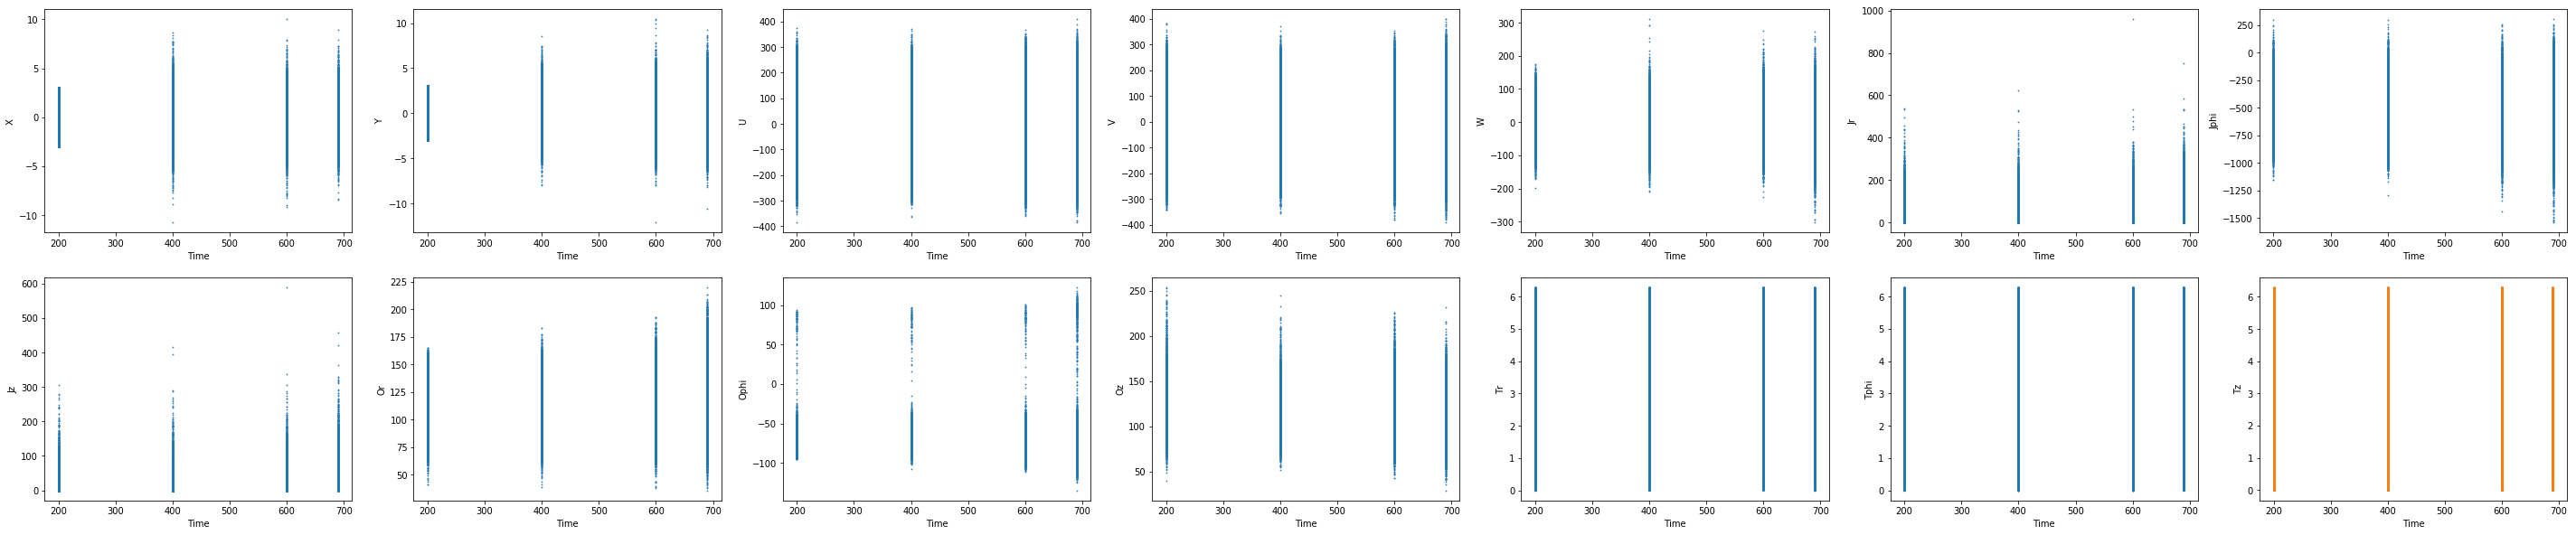

In [15]:
#graph em
fig,axs = plt.subplots(nrows=2, ncols=7, figsize=(50,10))

for i in range(0,15):
    if i == 0:
        x= Xplot
        y=timeplot
        xmin=0
        xmax=3.2
        ymin= 150
        ymax= 700
        axx= 0
        axy= 0
        xlabel= 'X'
        ylabel= 'Time'
    
    elif i ==1:
        x= Yplot
        xmin= 0
        xmax= 3.2
        axx= 0
        axy= 1
        xlabel= 'Y'
    
    elif i ==2:
        x= Uplot
        xmin= -400
        xmax= -400
        axx= 0
        axy= 2
        xlabel= 'U'
    elif i ==3:
        x= Vplot
        xmin= -400
        xmax= 400
        axx= 0
        axy= 3
        xlabel= 'V'
    elif i ==4:
        x= Wplot
        xmin= -30
        xmax= 30
        axx= 0
        axy= 4
        xlabel = 'W'
    elif i ==5:
        x= Jrplot
        xmin= -100
        xmax= 100
        axx= 0
        axy= 5
        xlabel= 'Jr'
    elif i ==6:
        x= Jphiplot
        xmin= -835
        xmax= -825
        axx= 0
        axy= 6
        xlabel= 'Jphi'
    elif i ==7:
        x= Jzplot
        xmin= -10
        xmax= 10
        axx= 1
        axy= 0
        xlabel= 'Jz'
    elif i ==8:
        x= Orplot
        xmin= 0
        xmax= 40
        axx= 1
        axy= 1
        xlabel= 'Or'
    elif i ==9:
        x= Ophiplot
        xmin= -40
        xmax= 0
        axx= 1
        axy= 2
        xlabel= 'Ophi'
    elif i ==10:
        x= Ozplot
        xmin= 0
        xmax= 40
        axx= 1
        axy= 3
        xlabel= 'Oz'
    elif i ==11:
        x= Trplot
        xmin= 0
        xmax= 7
        axx= 1
        axy= 4
        xlabel= 'Tr'
    elif i ==12:
        x= Tphiplot
        axx= 1
        axy= 5
        xlabel= 'Tphi'
    else:
        x= Tzplot
        axx= 1
        axy= 6
        xlabel= 'Tz'
   
    axs[axx,axy].scatter(y,x,s=0.5,alpha=1)
    axs[axx,axy].set_xlabel(ylabel)
    axs[axx,axy].set_ylabel(xlabel)

Text(0,0.5,'Ophi')

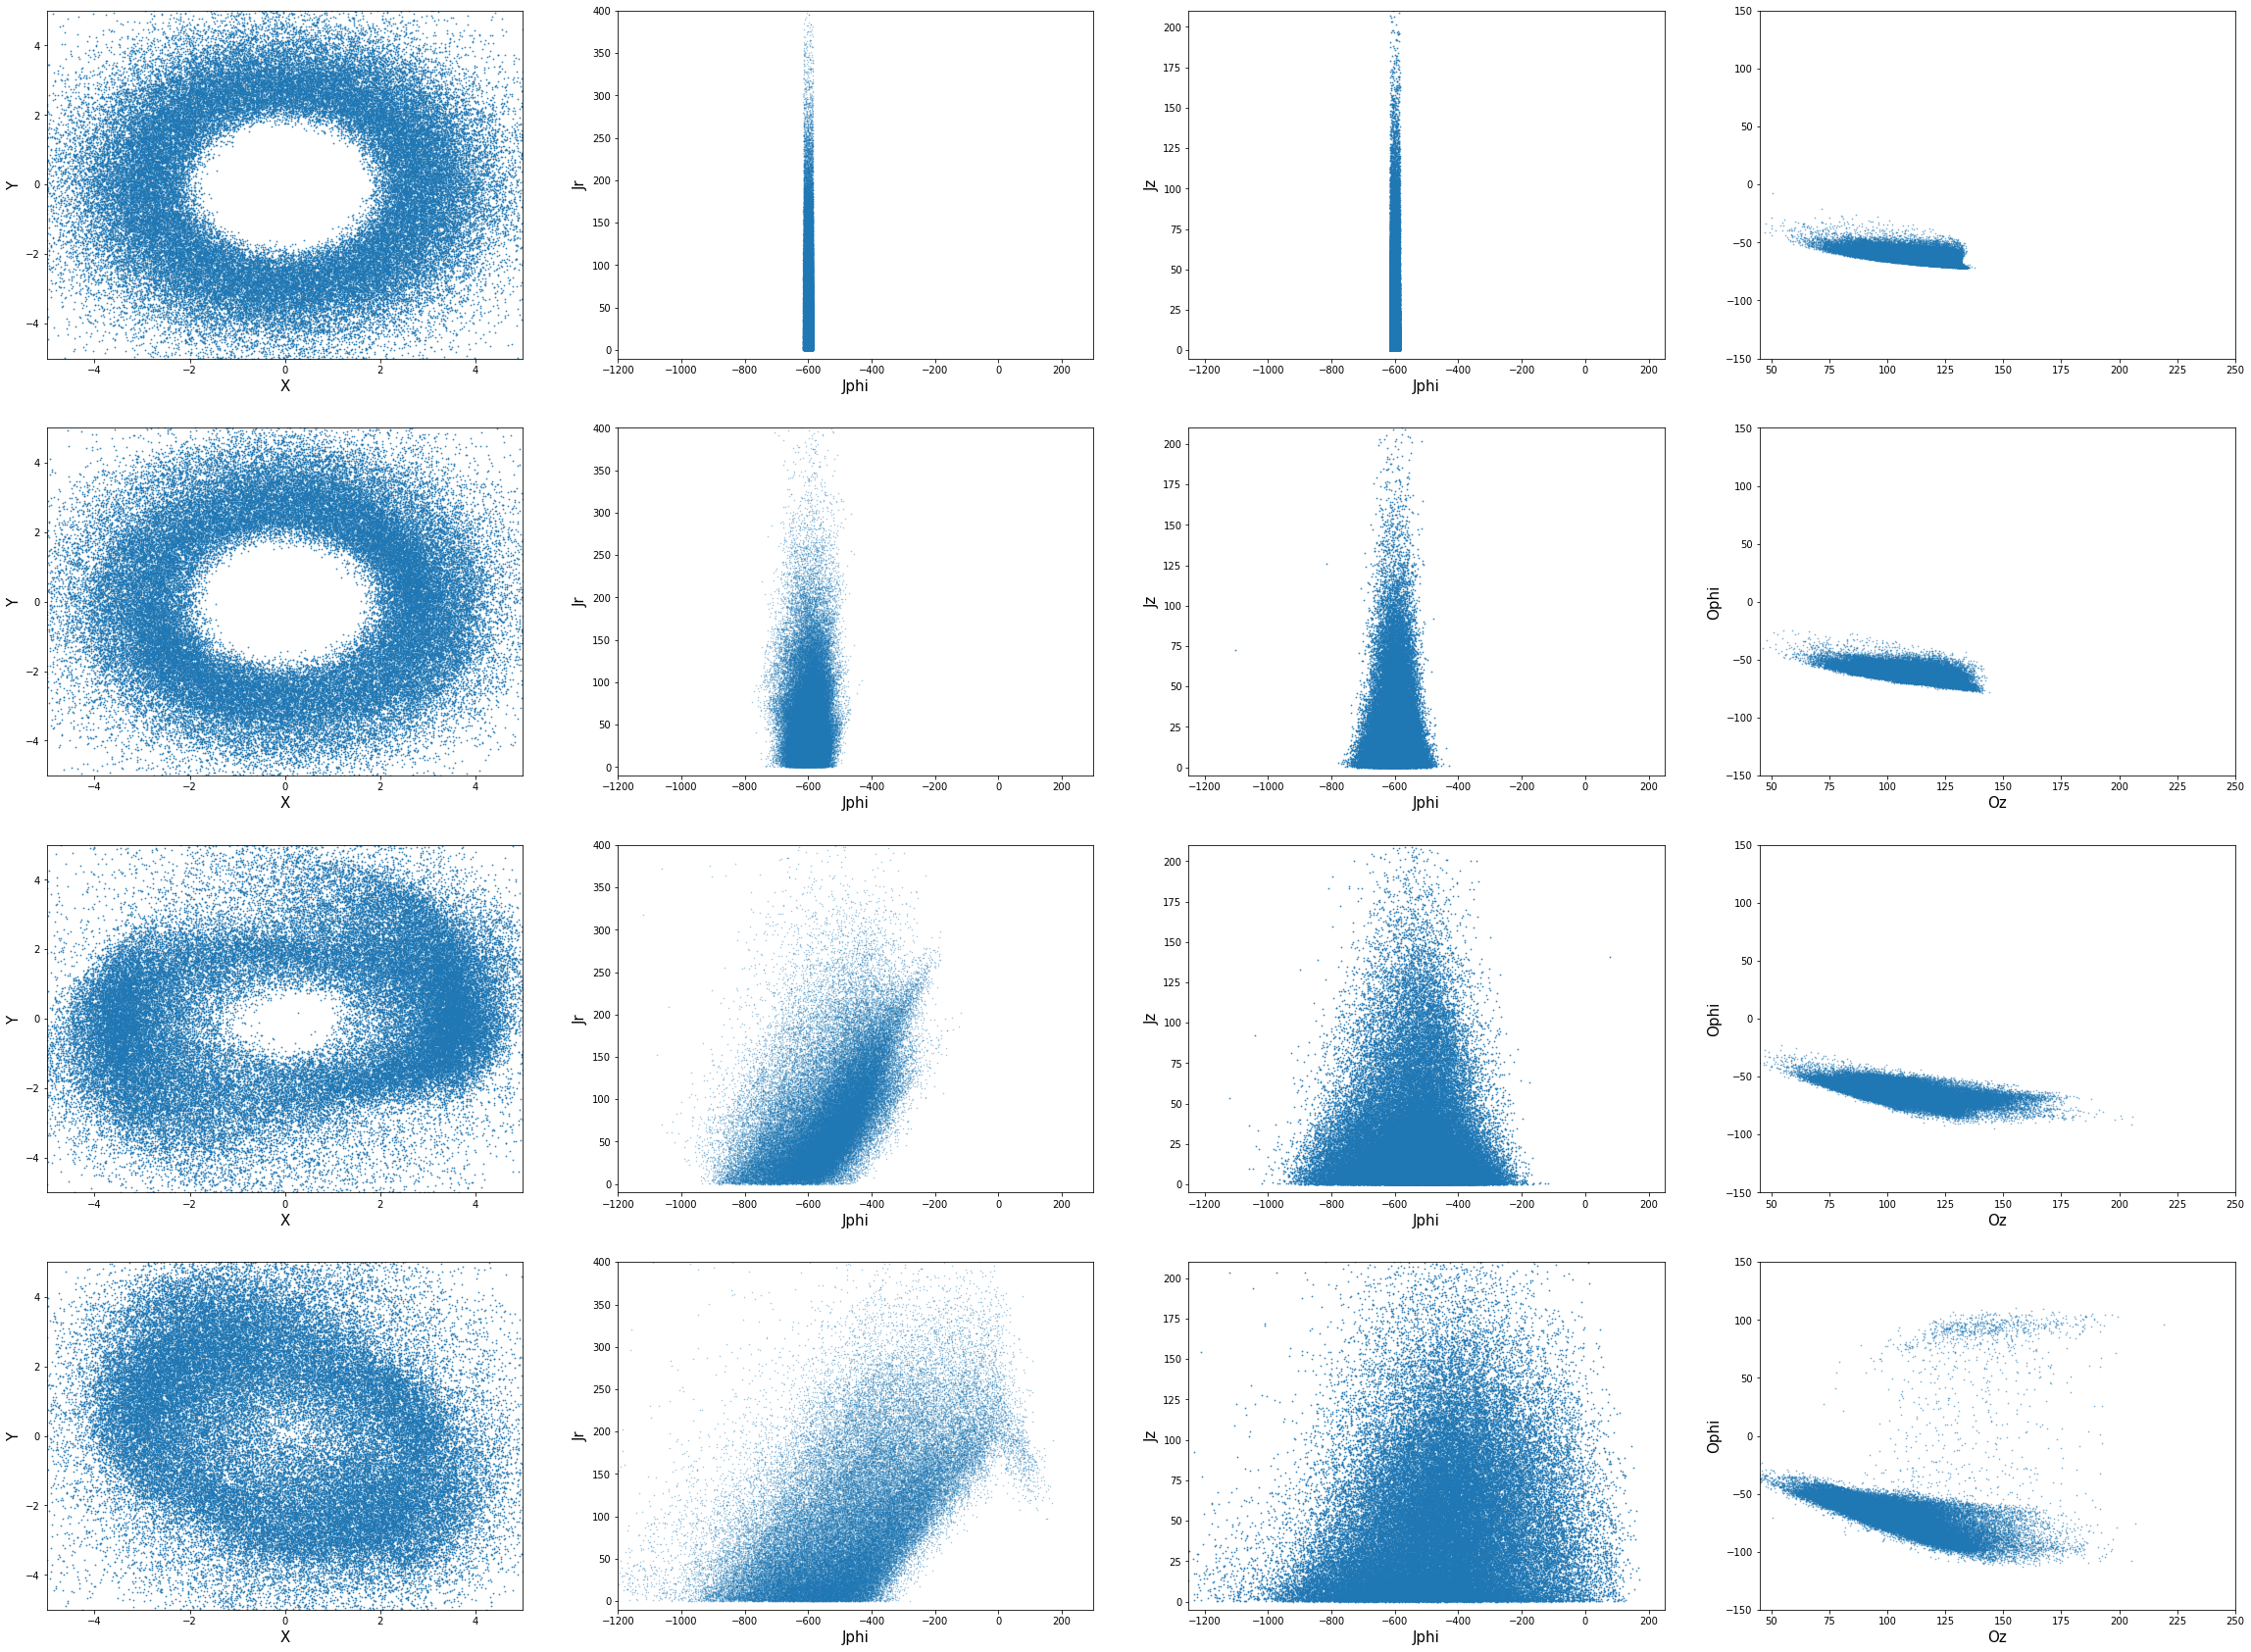

In [91]:

fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(40,30))
axs[0,0].scatter(newX_3, newY_3, s=0.7,alpha=0.8)
axs[0,0].axis([-5,5,-5,5])
axs[0,0].set_xlabel("X", size=15)
axs[0,0].set_ylabel("Y", size=15)
axs[0,1].scatter(newJphi_3, newJr_3,s=0.3,alpha=0.4)
axs[0,1].axis([-1200,300,-10,400])
axs[0,1].set_xlabel("Jphi", size=15)
axs[0,1].set_ylabel("Jr", size=15)
axs[0,2].scatter(newJphi_3, newJz_3,s=0.7,alpha=0.8)
axs[0,2].axis([-1250,250,-5, 210])
axs[0,2].set_xlabel("Jphi", size=15)
axs[0,2].set_ylabel("Jz", size=15)
axs[0,3].scatter(newOz_3, newOphi_3,s=0.5,alpha=0.5)
axs[0,3].axis([45,250,-150,150])

axs[1,0].scatter(newX2_3, newY2_3,s=0.7,alpha=0.8)
axs[1,0].axis([-5,5,-5,5])
axs[1,0].set_xlabel("X", size=15)
axs[1,0].set_ylabel("Y", size=15)
axs[1,1].scatter(newJphi2_3, newJr2_3,s=0.3,alpha=0.4)
axs[1,1].axis([-1200,300,-10,400])
axs[1,1].set_xlabel("Jphi", size=15)
axs[1,1].set_ylabel("Jr", size=15)
axs[1,2].scatter(newJphi2_3, newJz2_3,s=0.7,alpha=0.8)
axs[1,2].axis([-1250,250,-5, 210])
axs[1,2].set_xlabel("Jphi", size=15)
axs[1,2].set_ylabel("Jz", size=15)
axs[1,3].scatter(newOz2_3, newOphi2_3,s=0.5,alpha=0.5)
axs[1,3].axis([45,250,-150,150])
axs[1,3].set_xlabel("Oz", size=15)
axs[1,3].set_ylabel("Ophi", size=15)

axs[2,0].scatter(newX3_3, newY3_3,s=0.7,alpha=0.8)
axs[2,0].axis([-5,5,-5,5])
axs[2,0].set_xlabel("X", size=15)
axs[2,0].set_ylabel("Y", size=15)
axs[2,1].scatter(newJphi3_3, newJr3_3,s=0.3,alpha=0.4)
axs[2,1].axis([-1200,300,-10,400])
axs[2,1].set_xlabel("Jphi", size=15)
axs[2,1].set_ylabel("Jr", size=15)
axs[2,2].scatter(newJphi3_3, newJz3_3,s=0.7,alpha=0.8)
axs[2,2].axis([-1250,250,-5, 210])
axs[2,2].set_xlabel("Jphi", size=15)
axs[2,2].set_ylabel("Jz", size=15)
axs[2,3].scatter(newOz3_3, newOphi3_3,s=0.5,alpha=0.5)
axs[2,3].axis([45,250,-150,150])
axs[2,3].set_xlabel("Oz", size=15)
axs[2,3].set_ylabel("Ophi", size=15)

axs[3,0].scatter(newX4_3, newY4_3,s=0.7,alpha=0.8)
axs[3,0].axis([-5,5,-5,5])
axs[3,0].set_xlabel("X", size=15)
axs[3,0].set_ylabel("Y", size=15)
axs[3,1].scatter(newJphi4_3, newJr4_3,s=0.3,alpha=0.4)
axs[3,1].axis([-1200,300,-10,400])
axs[3,1].set_xlabel("Jphi", size=15)
axs[3,1].set_ylabel("Jr", size=15)
axs[3,2].scatter(newJphi4_3, newJz4_3,s=0.7,alpha=0.8)
axs[3,2].axis([-1250,250,-5, 210])
axs[3,2].set_xlabel("Jphi", size=15)
axs[3,2].set_ylabel("Jz", size=15)
axs[3,3].scatter(newOz4_3, newOphi4_3,s=0.5,alpha=0.5)
axs[3,3].axis([45,250,-150,150])
axs[3,3].set_xlabel("Oz", size=15)
axs[3,3].set_ylabel("Ophi", size=15)

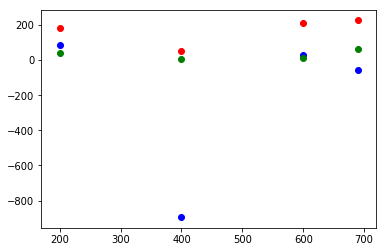

In [29]:
Jr1plot = np.vstack((newJr_3[1],newJr2_3[1],newJr3_3[1],newJr4_3[1]))
Jphi1plot = np.vstack((newJphi_3[1],newJphi2_3[1],newJphi3_3[1],newJphi4_3[1]))
Jz1plot = np.vstack((newJz_3[1],newJz2_3[1],newJz3_3[1],newJz4_3[1]))
time = [200,400,600,690]

plt.scatter(time,Jr1plot, c='r')
plt.scatter(time, Jphi1plot,c='b')
plt.scatter(time, Jz1plot, c='g')

(-12, 12)

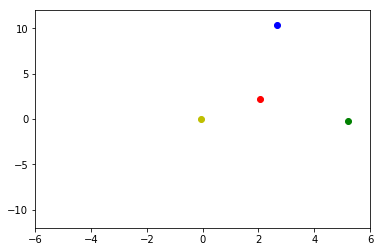

In [33]:
X1plot = np.vstack((newX_3[0],newX2_3[0],newX3_3[0],newX4_3[0]))
Y1plot = np.vstack((newY_3[0],newY2_3[0],newY3_3[0],newY4_3[0]))

plt.scatter(X1plot[0], Y1plot[0], c='r')
plt.scatter(X1plot[1], Y1plot[1], c='g')
plt.scatter(X1plot[2], Y1plot[2], c='b')
plt.scatter(X1plot[3], Y1plot[3], c='y')
plt.xlim(-6,6)
plt.ylim(-12,12)

In [40]:
ichoose = np.where((R<5.005) & (R>4.98))

newX_5 = Xdisk_200[ichoose]
newY_5 = Ydisk_200[ichoose]
newZ_5 = Zdisk_200[ichoose]

newU_5 = Udisk_200[ichoose]
newV_5 = Vdisk_200[ichoose]
newW_5 = Wdisk_200[ichoose]

newJr_5 = Jrdisk_200[ichoose]
newJphi_5 = Jphidisk_200[ichoose]
newJz_5 = Jzdisk_200[ichoose]

newOr_5 = Ordisk_200[ichoose]
newOphi_5 = Ophidisk_200[ichoose]
newOz_5 = Ozdisk_200[ichoose]

newTr_5 = Trdisk_200[ichoose]
newTphi_5 = Tphidisk_200[ichoose]
newTz_5 = Tzdisk_200[ichoose]

ids_5 = DiskIds_200[ichoose]

In [41]:
ichoose2 = IDmatch(DiskIds_400, ids_5)
       
newX2_5 = Xdisk_400[ichoose2]
newY2_5 = Ydisk_400[ichoose2]
newZ2_5 = Zdisk_400[ichoose2]

newU2_5 = Udisk_400[ichoose2]
newV2_5 = Vdisk_400[ichoose2]
newW2_5 = Wdisk_400[ichoose2]

newJr2_5 = Jrdisk_400[ichoose2]
newJphi2_5 = Jphidisk_400[ichoose2]
newJz2_5 = Jzdisk_400[ichoose2]

newOr2_5 = Ordisk_400[ichoose2]
newOphi2_5 = Ophidisk_400[ichoose2]
newOz2_5 = Ozdisk_400[ichoose2]

newTr2_5 = Trdisk_400[ichoose2]
newTphi2_5 = Tphidisk_400[ichoose2]
newTz2_5 = Tzdisk_400[ichoose2]

In [42]:
ichoose3 = IDmatch(DiskIds_600, ids_5)  

newX3_5 = Xdisk_600[ichoose3]
newY3_5 = Ydisk_600[ichoose3]
newZ3_5 = Zdisk_600[ichoose3]

newU3_5 = Udisk_600[ichoose3]
newV3_5 = Vdisk_600[ichoose3]
newW3_5 = Wdisk_600[ichoose3]

newJr3_5 = Jrdisk_600[ichoose3]
newJphi3_5 = Jphidisk_600[ichoose3]
newJz3_5 = Jzdisk_600[ichoose3]

newOr3_5 = Ordisk_600[ichoose3]
newOphi3_5 = Ophidisk_600[ichoose3]
newOz3_5 = Ozdisk_600[ichoose3]

newTr3_5 = Trdisk_600[ichoose3]
newTphi3_5 = Tphidisk_600[ichoose3]
newTz3_5 = Tzdisk_600[ichoose3]

In [43]:
ichoose4 = IDmatch(DiskIds_690, ids_5)            

newX4_5 = Xdisk_690[ichoose4]
newY4_5 = Ydisk_690[ichoose4]
newZ4_5 = Zdisk_690[ichoose4]

newU4_5 = Udisk_690[ichoose4]
newV4_5 = Vdisk_690[ichoose4]
newW4_5 = Wdisk_690[ichoose4]

newJr4_5 = Jrdisk_690[ichoose4]
newJphi4_5 = Jphidisk_690[ichoose4]
newJz4_5 = Jzdisk_690[ichoose4]

newOr4_5 = Ordisk_690[ichoose4]
newOphi4_5 = Ophidisk_690[ichoose4]
newOz4_5 = Ozdisk_690[ichoose4]

newTr4_5 = Trdisk_690[ichoose4]
newTphi4_5 = Tphidisk_690[ichoose4]
newTz4_5 = Tzdisk_690[ichoose4]

In [44]:
Xplot5 =  np.vstack((newX_5,newX2_5,newX3_5,newX4_5))
Yplot5 = np.vstack((newY_5,newY2_5,newY3_5,newY4_5))
Uplot5 = np.vstack((newU_5,newU2_5,newU3_5,newU4_5))
Vplot5 = np.vstack((newV_5,newV2_5,newV3_5,newV4_5))
Wplot5 = np.vstack((newW_5,newW2_5,newW3_5,newW4_5))
Jrplot5 = np.vstack((newJr_5,newJr2_5,newJr3_5,newJr4_5))
Jphiplot5 = np.vstack((newJphi_5,newJphi2_5,newJphi3_5,newJphi4_5))
Jzplot5 = np.vstack((newJz_5,newJz2_5,newJz3_5,newJz4_5))
Orplot5 = np.vstack((newOr_5,newOr2_5,newOr3_5,newOr4_5))
Ophiplot5 = np.vstack((newOphi_5,newOphi2_5,newOphi3_5,newOphi4_5))
Ozplot5 = np.vstack((newOz_5,newOz2_5,newOz3_5,newOz4_5))
Trplot5 = np.vstack((newTr_5,newTr2_5,newTr3_5,newTr4_5))
Tphiplot5 = np.vstack((newTphi_5,newTphi2_5,newTphi3_5,newTphi4_5))
Tzplot5 = np.vstack((newTz_5,newTz2_5,newTz3_5,newTz4_5))
time1_5 = np.full((len(newX_5)), 200) 
time2_5 = np.full((len(newX2_5)), 400) 
time3_5 = np.full((len(newX3_5)), 600) 
time4_5 = np.full((len(newX4_5)), 690) 
timeplot_5 = np.vstack((time1_5,time2_5,time3_5,time4_5))

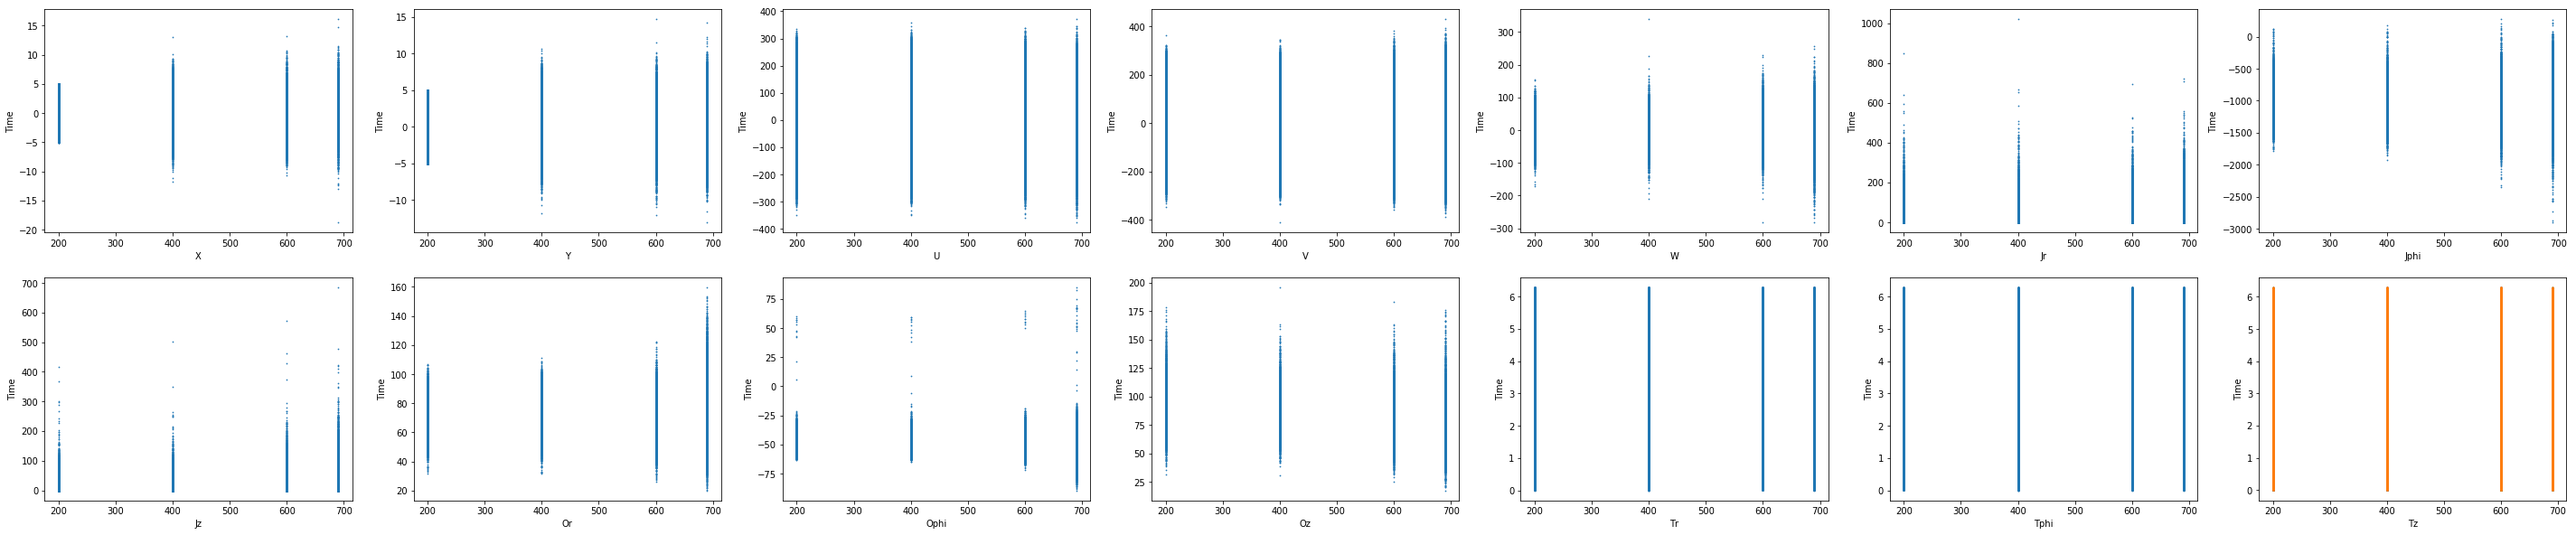

In [46]:
#graph em
fig,axs = plt.subplots(nrows=2, ncols=7, figsize=(50,10))

for i in range(0,15):
    if i == 0:
        x= Xplot5
        y=timeplot_5
        xmin= 0
        xmax= 5.2
        ymin= 150
        ymax= 700
        axx= 0
        axy= 0
        xlabel= 'X'
        ylabel= 'Time'
    
    elif i ==1:
        x= Yplot5
        xmin= 0
        xmax= 5.2
        axx= 0
        axy= 1
        xlabel= 'Y'
    
    elif i ==2:
        x= Uplot5
        xmin= -400
        xmax= 400
        axx= 0
        axy= 2
        xlabel= 'U'
    elif i ==3:
        x= Vplot5
        xmin= -400
        xmax= 400
        axx= 0
        axy= 3
        xlabel= 'V'
    elif i ==4:
        x= Wplot5
        xmin= -30
        xmax= 30
        axx= 0
        axy= 4
        xlabel = 'W'
    elif i ==5:
        x= Jrplot5
        xmin= -100
        xmax= 100
        axx= 0
        axy= 5
        xlabel= 'Jr'
    elif i ==6:
        x= Jphiplot5
        xmin= -1560
        xmax= -1555
        axx= 0
        axy= 6
        xlabel= 'Jphi'
    elif i ==7:
        x= Jzplot5
        xmin= -10
        xmax= 10
        axx= 1
        axy= 0
        xlabel= 'Jz'
    elif i ==8:
        x= Orplot5
        xmin= 0
        xmax= 40
        axx= 1
        axy= 1
        xlabel= 'Or'
    elif i ==9:
        x= Ophiplot5
        xmin= -40
        xmax= 0
        axx= 1
        axy= 2
        xlabel= 'Ophi'
    elif i ==10:
        x= Ozplot5
        xmin= 0
        xmax= 40
        axx= 1
        axy= 3
        xlabel= 'Oz'
    elif i ==11:
        x= Trplot5
        xmin= 0
        xmax= 7
        axx= 1
        axy= 4
        xlabel= 'Tr'
    elif i ==12:
        x= Tphiplot5
        axx= 1
        axy= 5
        xlabel= 'Tphi'
    else:
        x= Tzplot5
        axx= 1
        axy= 6
        xlabel= 'Tz'
   
    axs[axx,axy].scatter(y,x,s=0.5,alpha=1)
    axs[axx,axy].set_xlabel(xlabel)
    axs[axx,axy].set_ylabel(ylabel)

[20, 160, -90, -20]

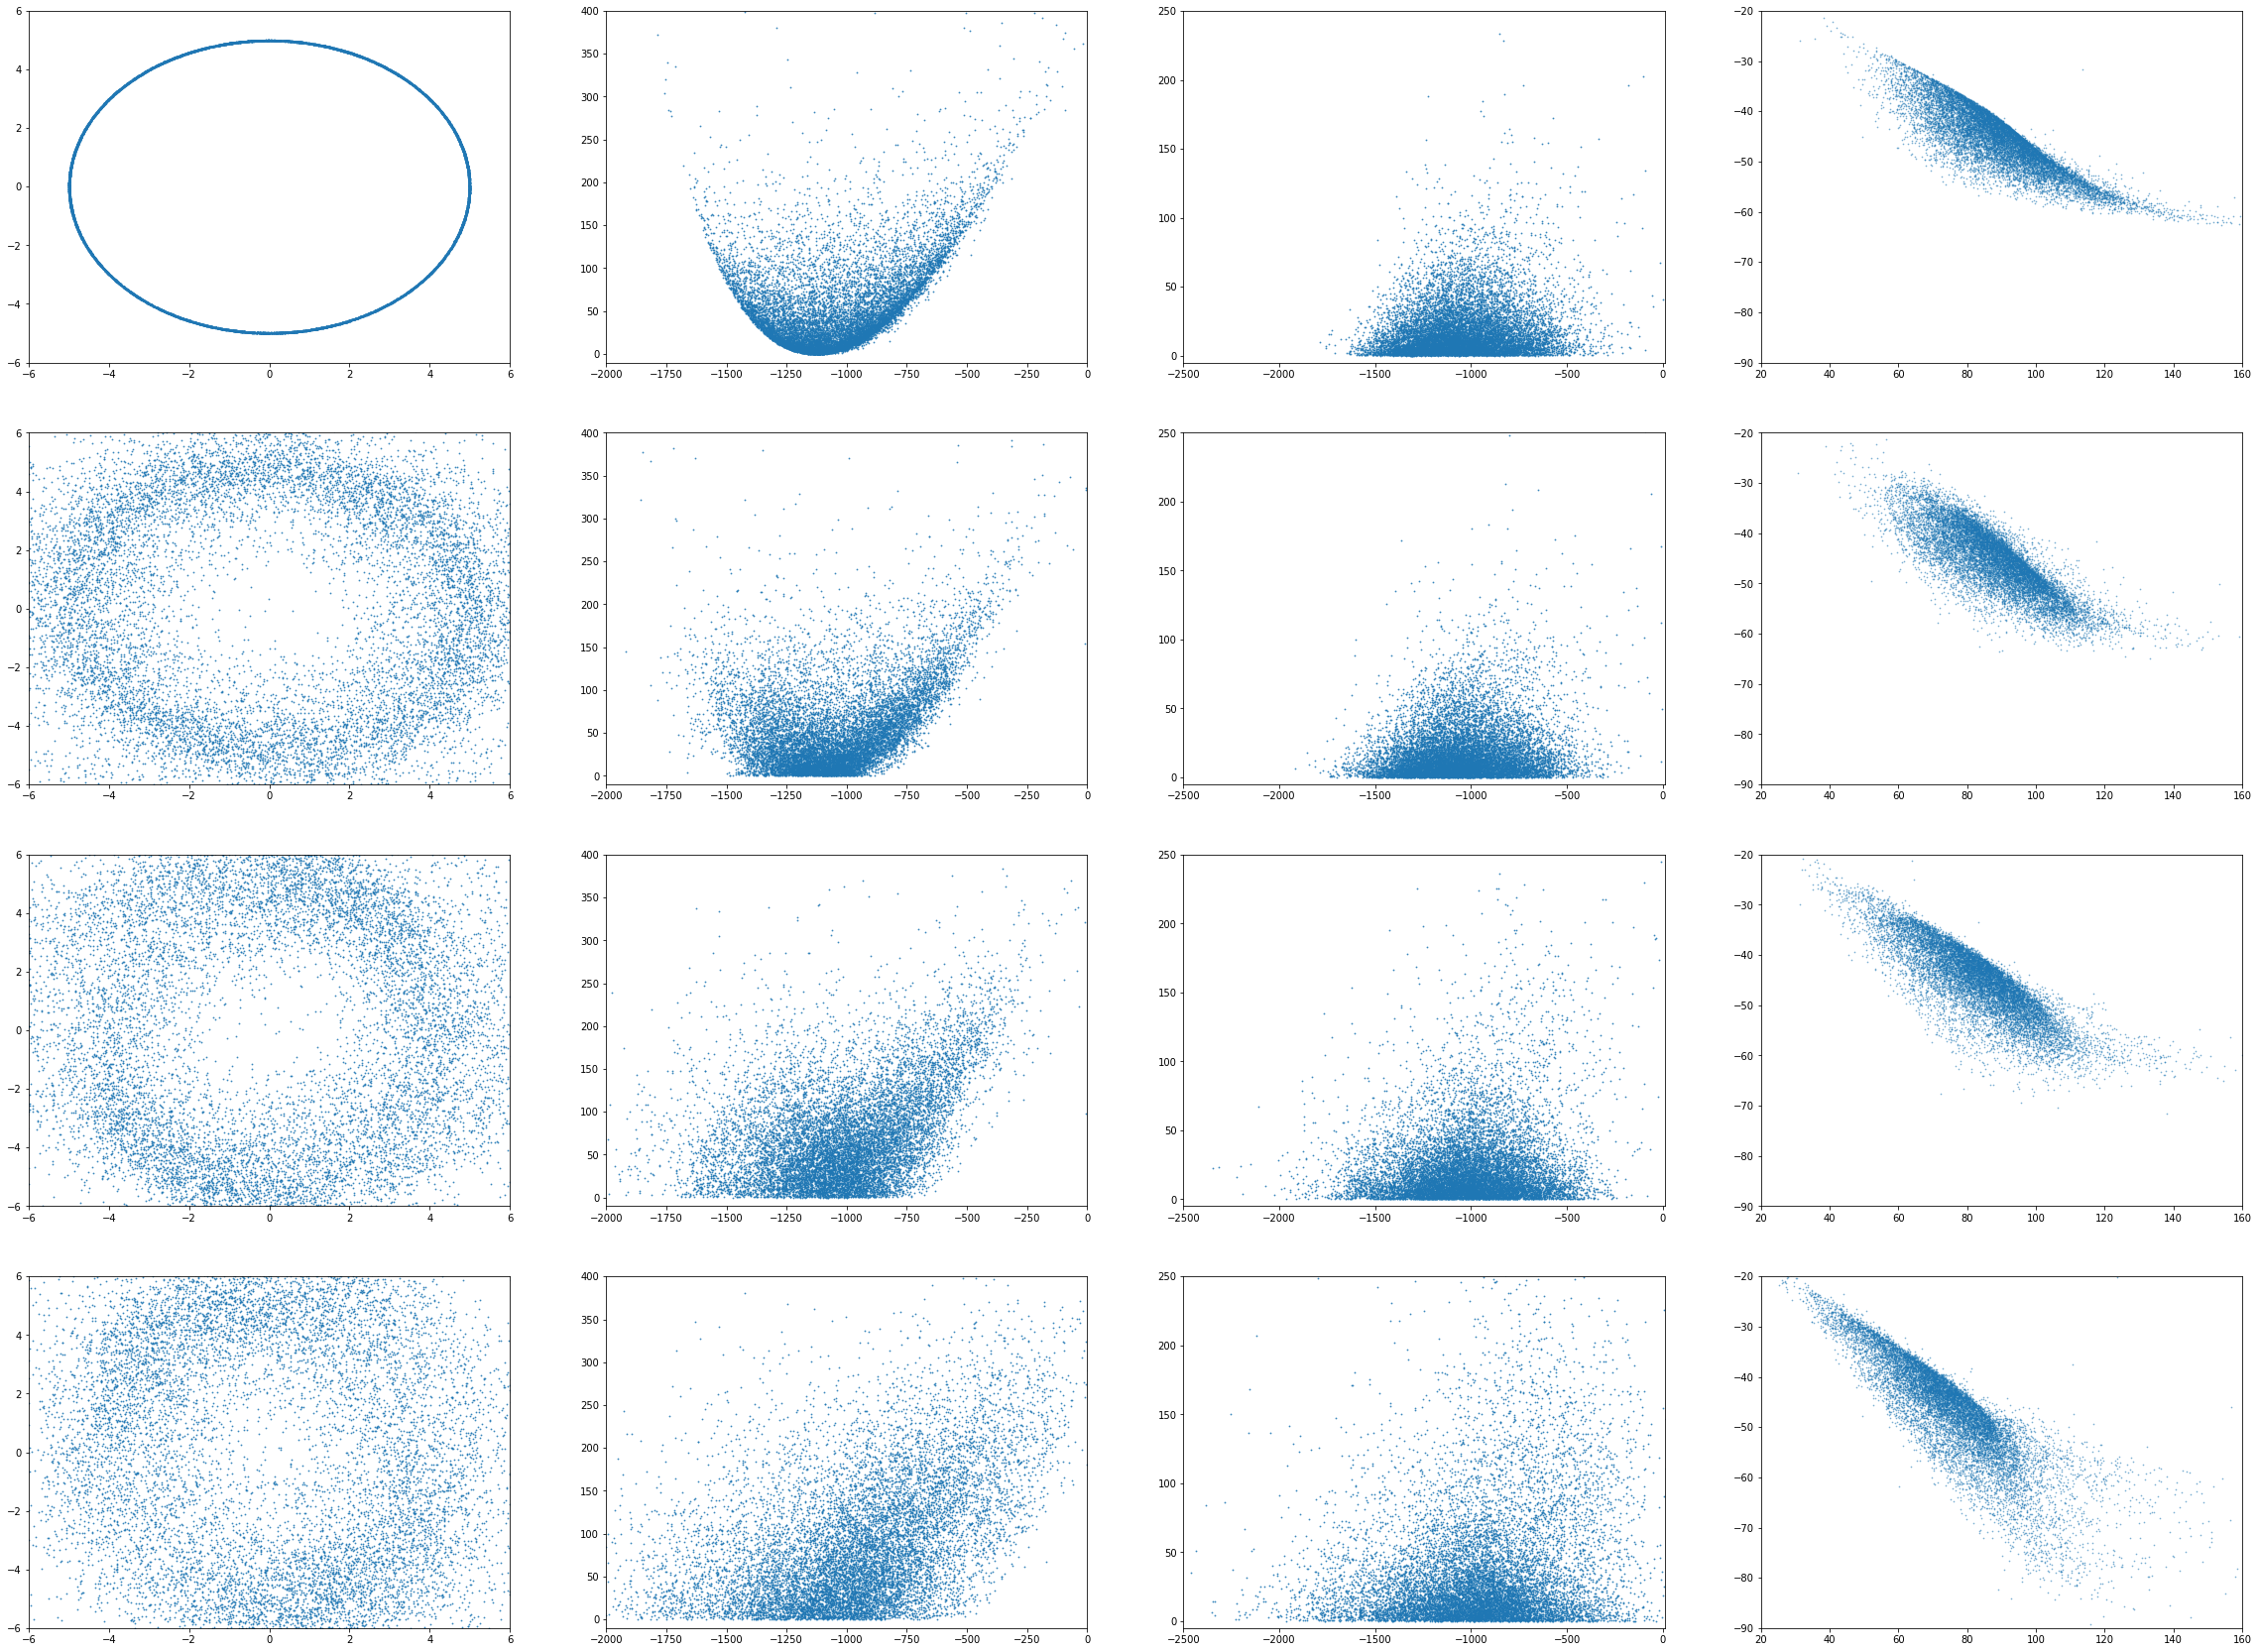

In [51]:

fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(40,30))
axs[0,0].scatter(newX_5, newY_5, s=0.7,alpha=0.8)
axs[0,0].axis([-6,6,-6,6])
axs[0,1].scatter(newJphi_5, newJr_5,s=0.7,alpha=0.8)
axs[0,1].axis([-2000,0,-10,400])
axs[0,2].scatter(newJphi_5, newJz_5,s=0.7,alpha=0.8)
axs[0,2].axis([-2500,10,-5, 250])
axs[0,3].scatter(newOz_5, newOphi_5,s=0.5,alpha=0.5)
axs[0,3].axis([20,160,-90,-20])

axs[1,0].scatter(newX2_5, newY2_5,s=0.7,alpha=0.8)
axs[1,0].axis([-6,6,-6,6])
axs[1,1].scatter(newJphi2_5, newJr2_5,s=0.7,alpha=0.8)
axs[1,1].axis([-2000,0,-10,400])
axs[1,2].scatter(newJphi2_5, newJz2_5,s=0.7,alpha=0.8)
axs[1,2].axis([-2500,10,-5, 250])
axs[1,3].scatter(newOz2_5, newOphi2_5,s=0.5,alpha=0.5)
axs[1,3].axis([20,160,-90,-20])

axs[2,0].scatter(newX3_5, newY3_5,s=0.7,alpha=0.8)
axs[2,0].axis([-6,6,-6,6])
axs[2,1].scatter(newJphi3_5, newJr3_5,s=0.7,alpha=0.8)
axs[2,1].axis([-2000,0,-10,400])
axs[2,2].scatter(newJphi3_5, newJz3_5,s=0.7,alpha=0.8)
axs[2,2].axis([-2500,10,-5, 250])
axs[2,3].scatter(newOz3_5, newOphi3_5,s=0.5,alpha=0.5)
axs[2,3].axis([20,160,-90,-20])

axs[3,0].scatter(newX4_5, newY4_5,s=0.7,alpha=0.8)
axs[3,0].axis([-6,6,-6,6])
axs[3,1].scatter(newJphi4_5, newJr4_5,s=0.7,alpha=0.8)
axs[3,1].axis([-2000,0,-10,400])
axs[3,2].scatter(newJphi4_5, newJz4_5,s=0.7,alpha=0.8)
axs[3,2].axis([-2500,10,-5, 250])
axs[3,3].scatter(newOz4_5, newOphi4_5,s=0.5,alpha=0.5)
axs[3,3].axis([20,160,-90,-20])

In [52]:
ichoose = np.where((R<8.005) & (R>7.98))

newX_8 = Xdisk_200[ichoose]
newY_8 = Ydisk_200[ichoose]
newZ_8 = Zdisk_200[ichoose]

newU_8 = Udisk_200[ichoose]
newV_8 = Vdisk_200[ichoose]
newW_8 = Wdisk_200[ichoose]

newJr_8 = Jrdisk_200[ichoose]
newJphi_8 = Jphidisk_200[ichoose]
newJz_8 = Jzdisk_200[ichoose]

newOr_8 = Ordisk_200[ichoose]
newOphi_8 = Ophidisk_200[ichoose]
newOz_8 = Ozdisk_200[ichoose]

newTr_8 = Trdisk_200[ichoose]
newTphi_8 = Tphidisk_200[ichoose]
newTz_8 = Tzdisk_200[ichoose]

ids_8 = DiskIds_200[ichoose]

In [53]:
ichoose2 = IDmatch(DiskIds_400, ids_8)

newX2_8 = Xdisk_400[ichoose2]
newY2_8 = Ydisk_400[ichoose2]
newZ2_8 = Zdisk_400[ichoose2]

newU2_8 = Udisk_400[ichoose2]
newV2_8 = Vdisk_400[ichoose2]
newW2_8 = Wdisk_400[ichoose2]

newJr2_8 = Jrdisk_400[ichoose2]
newJphi2_8 = Jphidisk_400[ichoose2]
newJz2_8 = Jzdisk_400[ichoose2]

newOr2_8 = Ordisk_400[ichoose2]
newOphi2_8 = Ophidisk_400[ichoose2]
newOz2_8 = Ozdisk_400[ichoose2]

newTr2_8 = Trdisk_400[ichoose2]
newTphi2_8 = Tphidisk_400[ichoose2]
newTz2_8 = Tzdisk_400[ichoose2]

In [54]:
ichoose3 = IDmatch(DiskIds_600, ids_8)

newX3_8 = Xdisk_600[ichoose3]
newY3_8 = Ydisk_600[ichoose3]
newZ3_8 = Zdisk_600[ichoose3]

newU3_8 = Udisk_600[ichoose3]
newV3_8 = Vdisk_600[ichoose3]
newW3_8 = Wdisk_600[ichoose3]

newJr3_8 = Jrdisk_600[ichoose3]
newJphi3_8 = Jphidisk_600[ichoose3]
newJz3_8 = Jzdisk_600[ichoose3]

newOr3_8 = Ordisk_600[ichoose3]
newOphi3_8 = Ophidisk_600[ichoose3]
newOz3_8 = Ozdisk_600[ichoose3]

newTr3_8 = Trdisk_600[ichoose3]
newTphi3_8 = Tphidisk_600[ichoose3]
newTz3_8 = Tzdisk_600[ichoose3]

In [59]:
ichoose4 = IDmatch(DiskIds_690, ids_8)

newX4_8 = Xdisk_690[ichoose4]
newY4_8 = Ydisk_690[ichoose4]
newZ4_8 = Zdisk_690[ichoose4]

newU4_8 = Udisk_690[ichoose4]
newV4_8 = Vdisk_690[ichoose4]
newW4_8 = Wdisk_690[ichoose4]

newJr4_8 = Jrdisk_690[ichoose4]
newJphi4_8 = Jphidisk_690[ichoose4]
newJz4_8 = Jzdisk_690[ichoose4]

newOr4_8 = Ordisk_690[ichoose4]
newOphi4_8 = Ophidisk_690[ichoose4]
newOz4_8 = Ozdisk_690[ichoose4]

newTr4_8 = Trdisk_690[ichoose4]
newTphi4_8 = Tphidisk_690[ichoose4]
newTz4_8 = Tzdisk_690[ichoose4]

In [60]:
Xplot8 =  np.vstack((newX_8,newX2_8,newX3_8,newX4_8))
Yplot8 = np.vstack((newY_8,newY2_8,newY3_8,newY4_8))
Uplot8 = np.vstack((newU_8,newU2_8,newU3_8,newU4_8))
Vplot8 = np.vstack((newV_8,newV2_8,newV3_8,newV4_8))
Wplot8 = np.vstack((newW_8,newW2_8,newW3_8,newW4_8))
Jrplot8 = np.vstack((newJr_8,newJr2_8,newJr3_8,newJr4_8))
Jphiplot8 = np.vstack((newJphi_8,newJphi2_8,newJphi3_8,newJphi4_8))
Jzplot8 = np.vstack((newJz_8,newJz2_8,newJz3_8,newJz4_8))
Orplot8 = np.vstack((newOr_8,newOr2_8,newOr3_8,newOr4_8))
Ophiplot8 = np.vstack((newOphi_8,newOphi2_8,newOphi3_8,newOphi4_8))
Ozplot8 = np.vstack((newOz_8,newOz2_8,newOz3_8,newOz4_8))
Trplot8 = np.vstack((newTr_8,newTr2_8,newTr3_8,newTr4_8))
Tphiplot8 = np.vstack((newTphi_8,newTphi2_8,newTphi3_8,newTphi4_8))
Tzplot8 = np.vstack((newTz_8,newTz2_8,newTz3_8,newTz4_8))
time1_8 = np.full((len(newX_8)), 200) 
time2_8 = np.full((len(newX2_8)), 400) 
time3_8 = np.full((len(newX3_8)), 600) 
time4_8 = np.full((len(newX4_8)), 690) 
timeplot_8 = np.vstack((time1_8,time2_8,time3_8,time4_8))

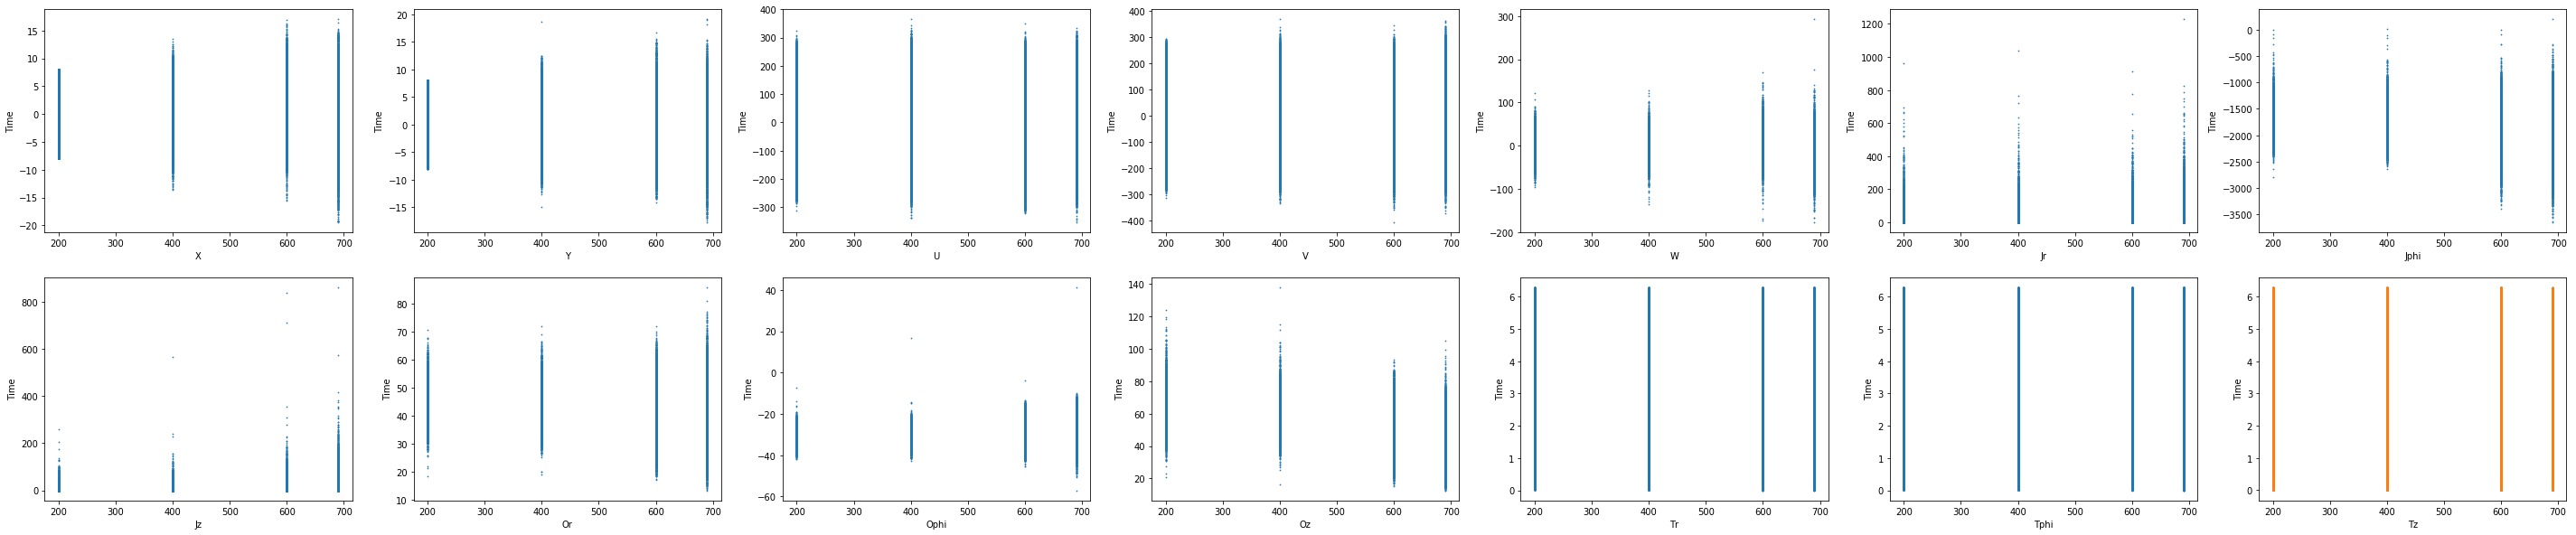

In [61]:
#graph em
fig,axs = plt.subplots(nrows=2, ncols=7, figsize=(50,10))

for i in range(0,15):
    if i == 0:
        x= Xplot8
        y=timeplot_8
        xmin= 0
        xmax= 8.2
        ymin= 150
        ymax= 700
        axx= 0
        axy= 0
        xlabel= 'X'
        ylabel= 'Time'
    
    elif i ==1:
        x= Yplot8
        xmin= 0
        xmax= 8.2
        axx= 0
        axy= 1
        xlabel= 'Y'
    
    elif i ==2:
        x= Uplot8
        xmin= -400
        xmax= 400
        axx= 0
        axy= 2
        xlabel= 'U'
    elif i ==3:
        x= Vplot8
        xmin= -400
        xmax= 400
        axx= 0
        axy= 3
        xlabel= 'V'
    elif i ==4:
        x= Wplot8
        xmin= -200
        xmax= 200
        axx= 0
        axy= 4
        xlabel = 'W'
    elif i ==5:
        x= Jrplot8
        xmin= -100
        xmax= 100
        axx= 0
        axy= 5
        xlabel= 'Jr'
    elif i ==6:
        x= Jphiplot8
        xmin= -2530
        xmax= -2525
        axx= 0
        axy= 6
        xlabel= 'Jphi'
    elif i ==7:
        x= Jzplot8
        xmin= -30
        xmax= 30
        axx= 1
        axy= 0
        xlabel= 'Jz'
    elif i ==8:
        x= Orplot8
        xmin= 0
        xmax= 40
        axx= 1
        axy= 1
        xlabel= 'Or'
    elif i ==9:
        x= Ophiplot8
        xmin= -40
        xmax= 0
        axx= 1
        axy= 2
        xlabel= 'Ophi'
    elif i ==10:
        x= Ozplot8
        xmin= 0
        xmax= 40
        axx= 1
        axy= 3
        xlabel= 'Oz'
    elif i ==11:
        x= Trplot8
        xmin= 0
        xmax= 7
        axx= 1
        axy= 4
        xlabel= 'Tr'
    elif i ==12:
        x= Tphiplot8
        axx= 1
        axy= 5
        xlabel= 'Tphi'
    else:
        x= Tzplot8
        axx= 1
        axy= 6
        xlabel= 'Tz'
   
    axs[axx,axy].scatter(y,x,s=0.5,alpha=1)
    axs[axx,axy].set_xlabel(xlabel)
    axs[axx,axy].set_ylabel(ylabel)


[10, 100, -50, -5]

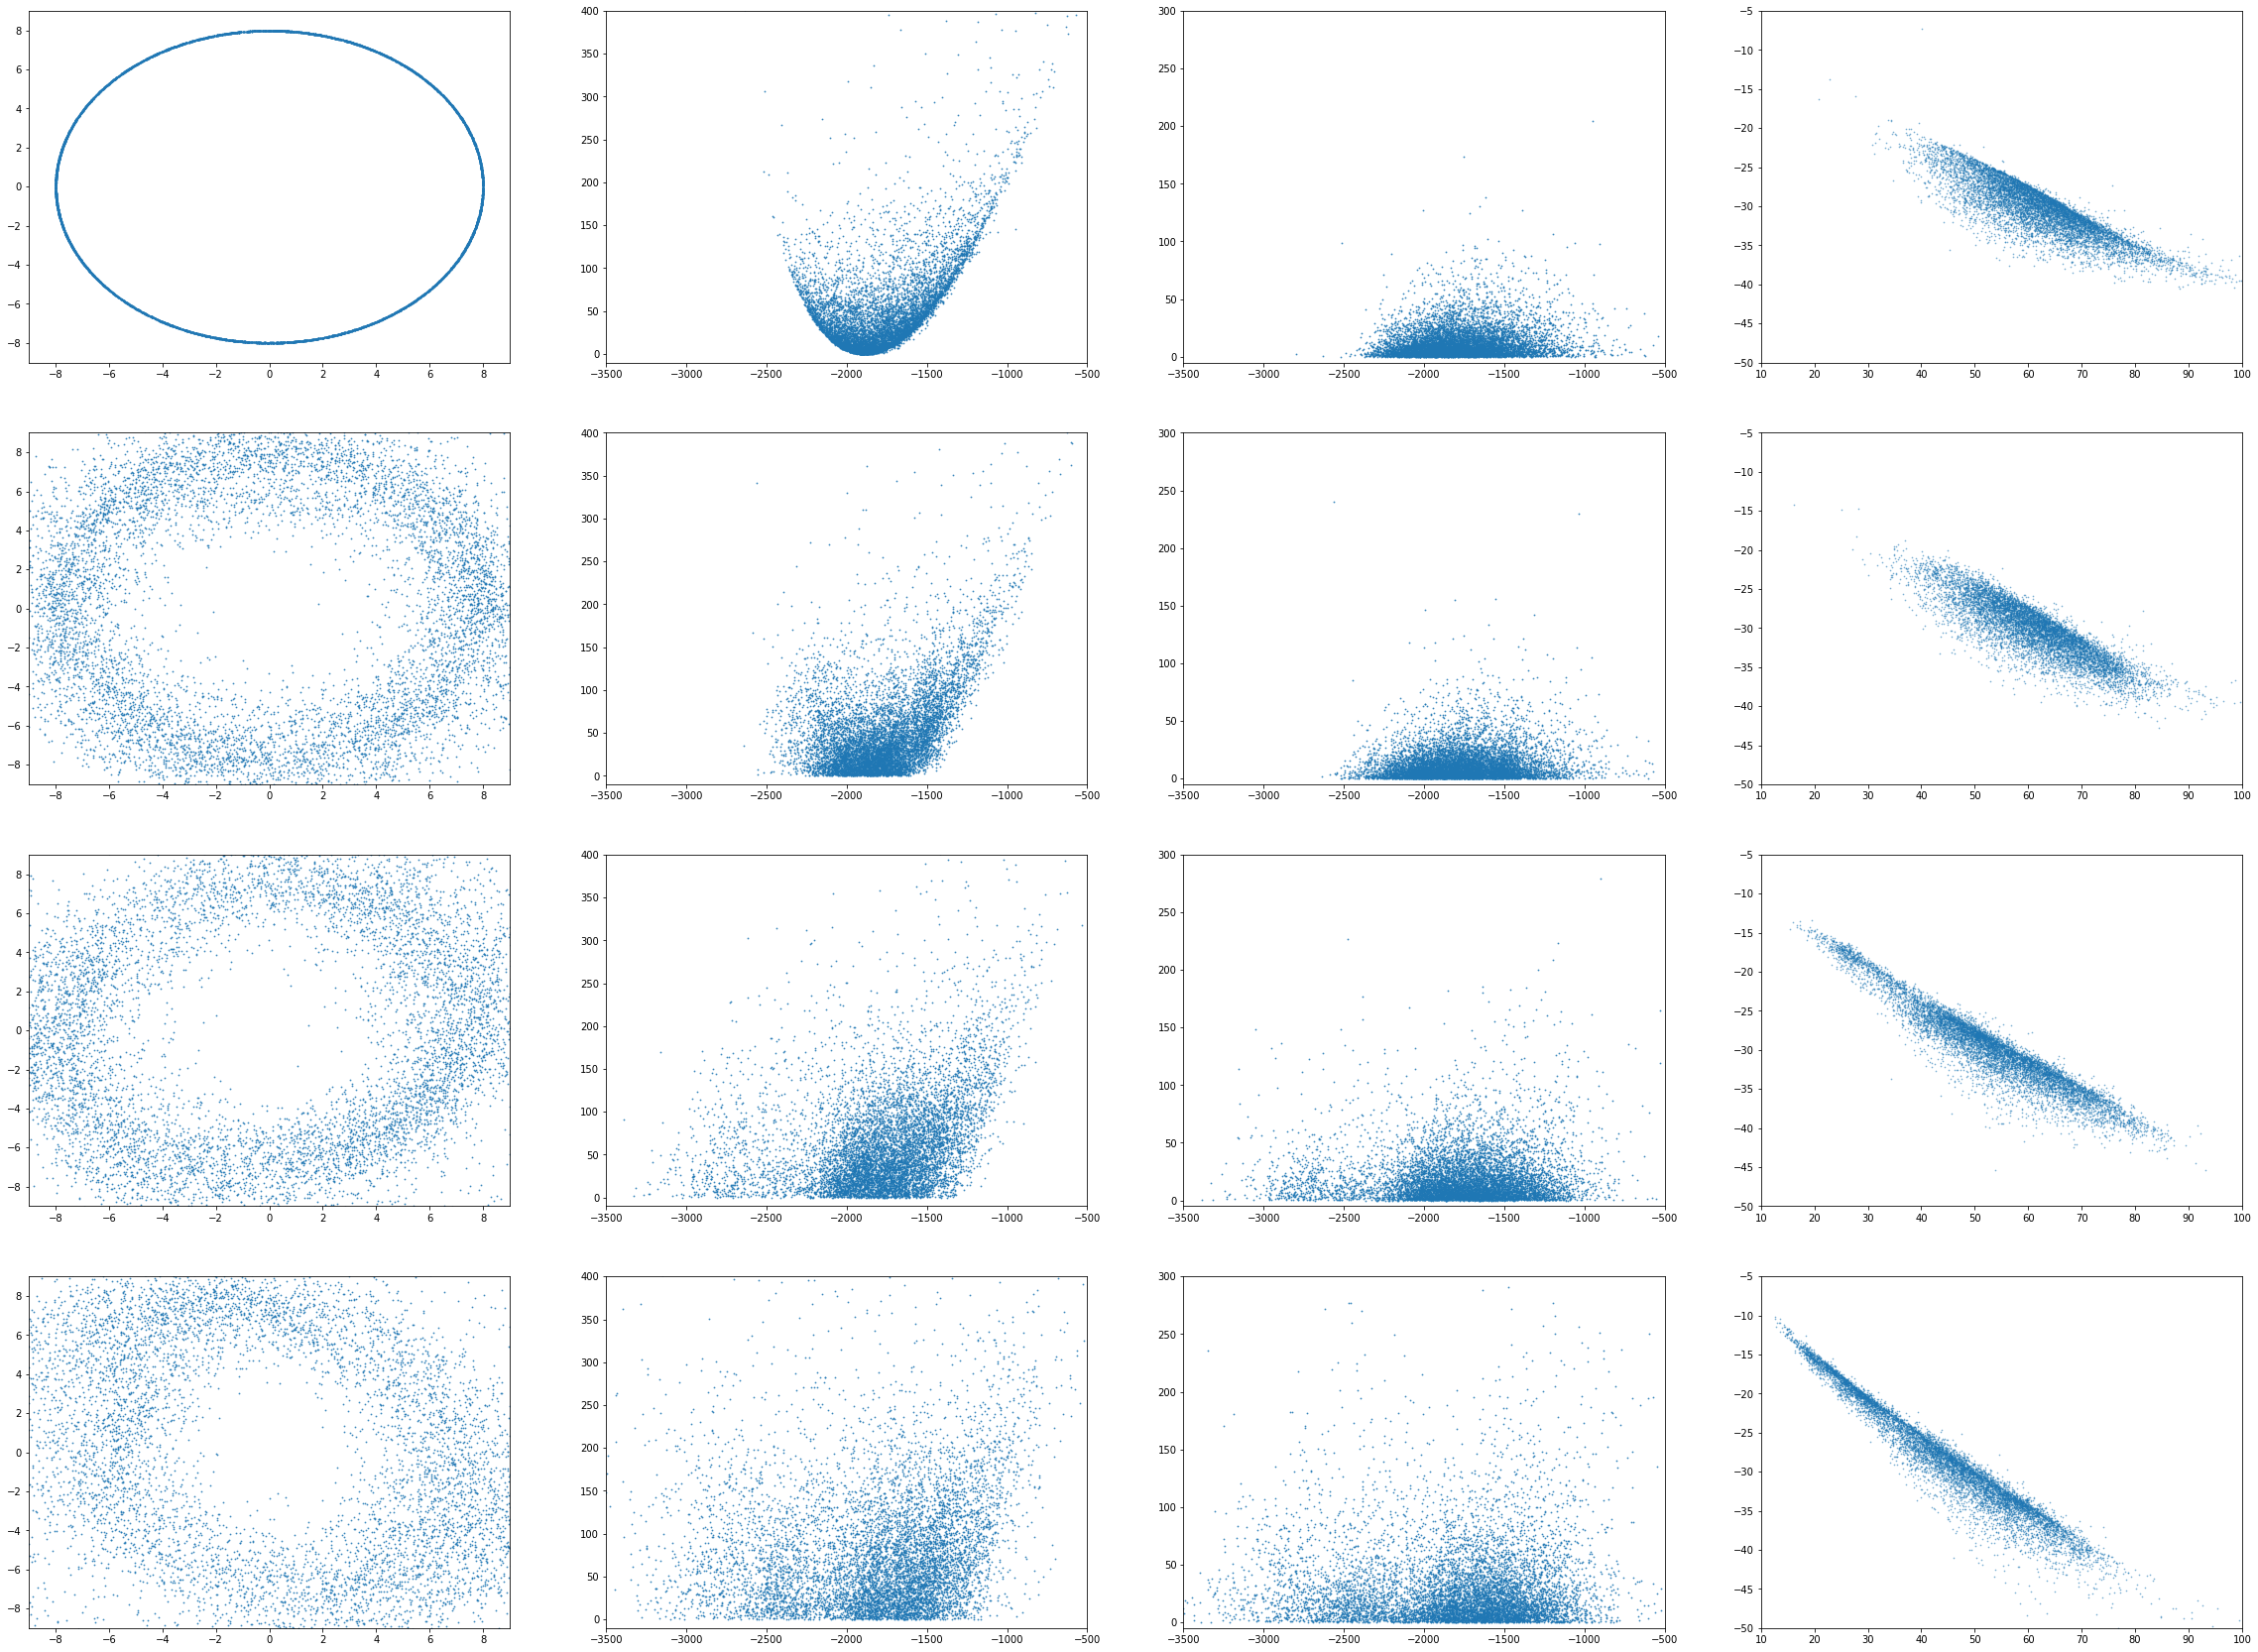

In [64]:

fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(40,30))
axs[0,0].scatter(newX_8, newY_8, s=0.7,alpha=0.8)
axs[0,0].axis([-9,9,-9,9])
axs[0,1].scatter(newJphi_8, newJr_8,s=0.7,alpha=0.8)
axs[0,1].axis([-3500,-500,-10,400])
axs[0,2].scatter(newJphi_8, newJz_8,s=0.7,alpha=0.8)
axs[0,2].axis([-3500,-500,-5, 300])
axs[0,3].scatter(newOz_8, newOphi_8,s=0.5,alpha=0.5)
axs[0,3].axis([10,100,-50,-5])

axs[1,0].scatter(newX2_8, newY2_8,s=0.7,alpha=0.8)
axs[1,0].axis([-9,9,-9,9])
axs[1,1].scatter(newJphi2_8, newJr2_8,s=0.7,alpha=0.8)
axs[1,1].axis([-3500,-500,-10,400])
axs[1,2].scatter(newJphi2_8, newJz2_8,s=0.7,alpha=0.8)
axs[1,2].axis([-3500,-500,-5, 300])
axs[1,3].scatter(newOz2_8, newOphi2_8,s=0.5,alpha=0.5)
axs[1,3].axis([10,100,-50,-5])

axs[2,0].scatter(newX3_8, newY3_8,s=0.7,alpha=0.8)
axs[2,0].axis([-9,9,-9,9])
axs[2,1].scatter(newJphi3_8, newJr3_8,s=0.7,alpha=0.8)
axs[2,1].axis([-3500,-500,-10,400])
axs[2,2].scatter(newJphi3_8, newJz3_8,s=0.7,alpha=0.8)
axs[2,2].axis([-3500,-500,-5, 300])
axs[2,3].scatter(newOz3_8, newOphi3_8,s=0.5,alpha=0.5)
axs[2,3].axis([10,100,-50,-5])

axs[3,0].scatter(newX4_8, newY4_8,s=0.7,alpha=0.8)
axs[3,0].axis([-9,9,-9,9])
axs[3,1].scatter(newJphi4_8, newJr4_8,s=0.7,alpha=0.8)
axs[3,1].axis([-3500,-500,-10,400])
axs[3,2].scatter(newJphi4_8, newJz4_8,s=0.7,alpha=0.8)
axs[3,2].axis([-3500,-500,-5, 300])
axs[3,3].scatter(newOz4_8, newOphi4_8,s=0.5,alpha=0.5)
axs[3,3].axis([10,100,-50,-5])

In [65]:
ichoose = np.where((R<15.005) & (R>14.98))

newX_15 = Xdisk_200[ichoose]
newY_15 = Ydisk_200[ichoose]
newZ_15 = Zdisk_200[ichoose]

newU_15 = Udisk_200[ichoose]
newV_15 = Vdisk_200[ichoose]
newW_15 = Wdisk_200[ichoose]

newJr_15 = Jrdisk_200[ichoose]
newJphi_15 = Jphidisk_200[ichoose]
newJz_15 = Jzdisk_200[ichoose]

newOr_15 = Ordisk_200[ichoose]
newOphi_15 = Ophidisk_200[ichoose]
newOz_15 = Ozdisk_200[ichoose]

newTr_15 = Trdisk_200[ichoose]
newTphi_15 = Tphidisk_200[ichoose]
newTz_15 = Tzdisk_200[ichoose]

ids_15 = DiskIds_200[ichoose]

In [66]:
ichoose2 = IDmatch(DiskIds_400, ids_15)

newX2_15 = Xdisk_400[ichoose2]
newY2_15 = Ydisk_400[ichoose2]
newZ2_15 = Zdisk_400[ichoose2]

newU2_15 = Udisk_400[ichoose2]
newV2_15 = Vdisk_400[ichoose2]
newW2_15 = Wdisk_400[ichoose2]

newJr2_15 = Jrdisk_400[ichoose2]
newJphi2_15 = Jphidisk_400[ichoose2]
newJz2_15 = Jzdisk_400[ichoose2]

newOr2_15 = Ordisk_400[ichoose2]
newOphi2_15 = Ophidisk_400[ichoose2]
newOz2_15 = Ozdisk_400[ichoose2]

newTr2_15 = Trdisk_400[ichoose2]
newTphi2_15 = Tphidisk_400[ichoose2]
newTz2_15 = Tzdisk_400[ichoose2]

In [67]:
ichoose3 = IDmatch(DiskIds_600, ids_15)

newX3_15 = Xdisk_600[ichoose3]
newY3_15 = Ydisk_600[ichoose3]
newZ3_15 = Zdisk_600[ichoose3]

newU3_15 = Udisk_600[ichoose3]
newV3_15 = Vdisk_600[ichoose3]
newW3_15 = Wdisk_600[ichoose3]

newJr3_15 = Jrdisk_600[ichoose3]
newJphi3_15 = Jphidisk_600[ichoose3]
newJz3_15 = Jzdisk_600[ichoose3]

newOr3_15 = Ordisk_600[ichoose3]
newOphi3_15 = Ophidisk_600[ichoose3]
newOz3_15 = Ozdisk_600[ichoose3]

newTr3_15 = Trdisk_600[ichoose3]
newTphi3_15 = Tphidisk_600[ichoose3]
newTz3_15 = Tzdisk_600[ichoose3]

In [68]:
ichoose4 = IDmatch(DiskIds_690, ids_15)

newX4_15 = Xdisk_690[ichoose4]
newY4_15 = Ydisk_690[ichoose4]
newZ4_15 = Zdisk_690[ichoose4]

newU4_15 = Udisk_690[ichoose4]
newV4_15 = Vdisk_690[ichoose4]
newW4_15 = Wdisk_690[ichoose4]

newJr4_15 = Jrdisk_690[ichoose4]
newJphi4_15 = Jphidisk_690[ichoose4]
newJz4_15 = Jzdisk_690[ichoose4]

newOr4_15 = Ordisk_690[ichoose4]
newOphi4_15 = Ophidisk_690[ichoose4]
newOz4_15 = Ozdisk_690[ichoose4]

newTr4_15 = Trdisk_690[ichoose4]
newTphi4_15 = Tphidisk_690[ichoose4]
newTz4_15 = Tzdisk_690[ichoose4]

In [69]:
Xplot15 =  np.vstack((newX_15,newX2_15,newX3_15,newX4_15))
Yplot15 = np.vstack((newY_15,newY2_15,newY3_15,newY4_15))
Uplot15 = np.vstack((newU_15,newU2_15,newU3_15,newU4_15))
Vplot15 = np.vstack((newV_15,newV2_15,newV3_15,newV4_15))
Wplot15 = np.vstack((newW_15,newW2_15,newW3_15,newW4_15))
Jrplot15 = np.vstack((newJr_15,newJr2_15,newJr3_15,newJr4_15))
Jphiplot15 = np.vstack((newJphi_15,newJphi2_15,newJphi3_15,newJphi4_15))
Jzplot15 = np.vstack((newJz_15,newJz2_15,newJz3_15,newJz4_15))
Orplot15 = np.vstack((newOr_15,newOr2_15,newOr3_15,newOr4_15))
Ophiplot15 = np.vstack((newOphi_15,newOphi2_15,newOphi3_15,newOphi4_15))
Ozplot15 = np.vstack((newOz_15,newOz2_15,newOz3_15,newOz4_15))
Trplot15 = np.vstack((newTr_15,newTr2_15,newTr3_15,newTr4_15))
Tphiplot15 = np.vstack((newTphi_15,newTphi2_15,newTphi3_15,newTphi4_15))
Tzplot15 = np.vstack((newTz_15,newTz2_15,newTz3_15,newTz4_15))
time1_15 = np.full((len(newX_15)), 200) 
time2_15 = np.full((len(newX2_15)), 400) 
time3_15 = np.full((len(newX3_15)), 600) 
time4_15 = np.full((len(newX4_15)), 690) 
timeplot_15 = np.vstack((time1_15,time2_15,time3_15,time4_15))

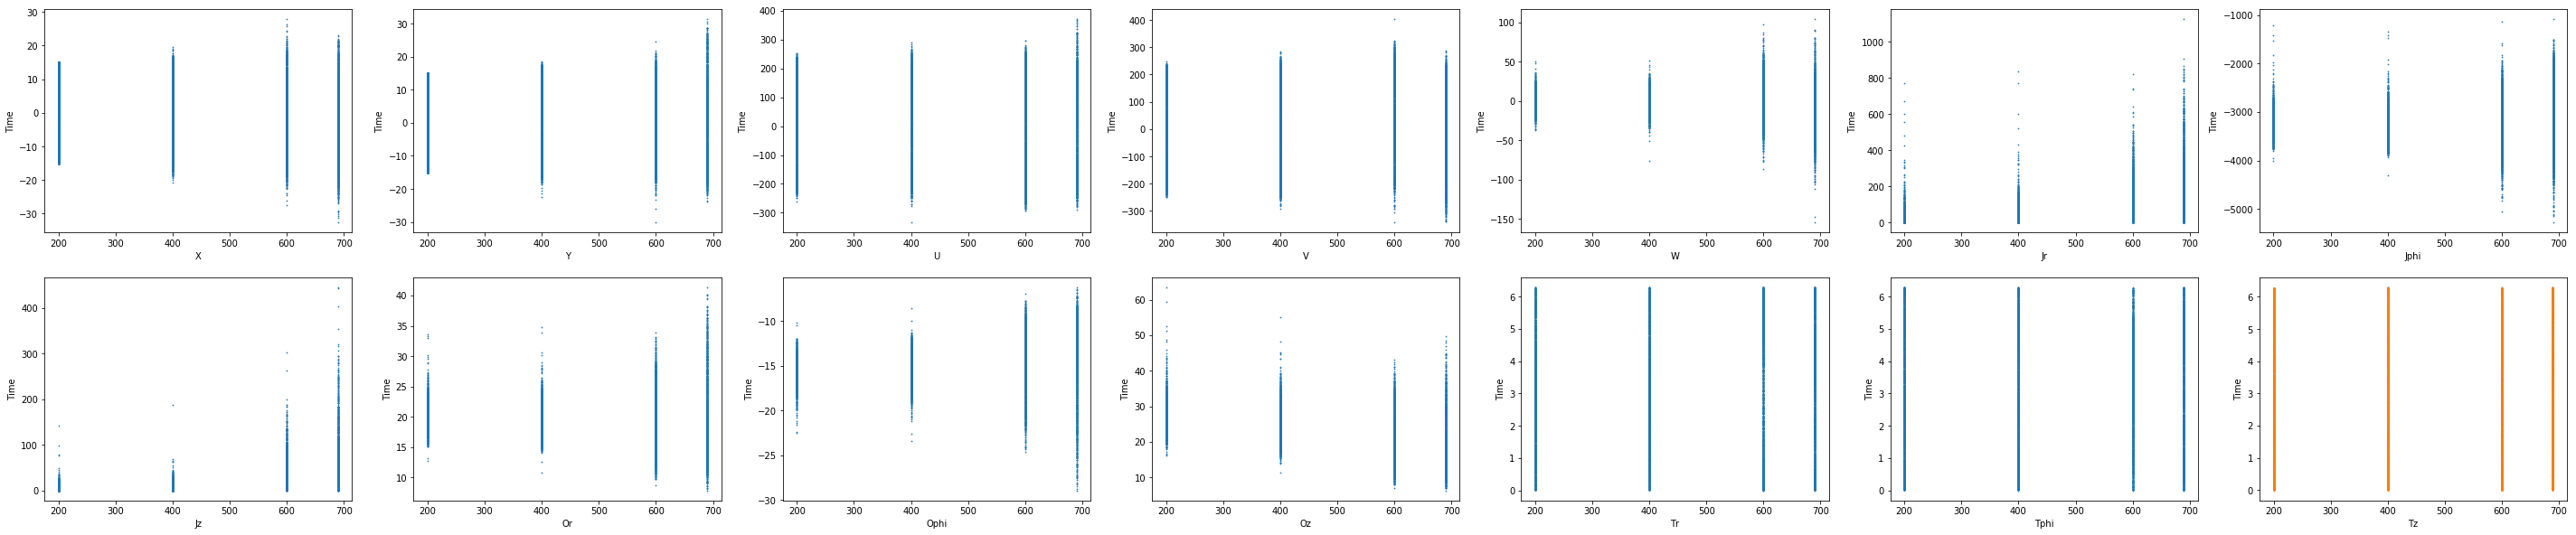

In [70]:
#graph em
fig,axs = plt.subplots(nrows=2, ncols=7, figsize=(50,10))

for i in range(0,15):
    if i == 0:
        x= Xplot15
        y=timeplot_15
        xmin= 0
        xmax= 15.2
        ymin= 150
        ymax= 700
        axx= 0
        axy= 0
        xlabel= 'X'
        ylabel= 'Time'
    
    elif i ==1:
        x= Yplot15
        xmin= 0
        xmax= 15.2
        axx= 0
        axy= 1
        xlabel= 'Y'
    
    elif i ==2:
        x= Uplot15
        xmin= -400
        xmax= 400
        axx= 0
        axy= 2
        xlabel= 'U'
    elif i ==3:
        x= Vplot15
        xmin= -400
        xmax= 400
        axx= 0
        axy= 3
        xlabel= 'V'
    elif i ==4:
        x= Wplot15
        xmin= -200
        xmax= 200
        axx= 0
        axy= 4
        xlabel = 'W'
    elif i ==5:
        x= Jrplot15
        xmin= -300
        xmax= 300
        axx= 0
        axy= 5
        xlabel= 'Jr'
    elif i ==6:
        x= Jphiplot15
        xmin= -4290
        xmax= -4285
        axx= 0
        axy= 6
        xlabel= 'Jphi'
    elif i ==7:
        x= Jzplot15
        xmin= -300
        xmax= 300
        axx= 1
        axy= 0
        xlabel= 'Jz'
    elif i ==8:
        x= Orplot15
        xmin= 0
        xmax= 40
        axx= 1
        axy= 1
        xlabel= 'Or'
    elif i ==9:
        x= Ophiplot15
        xmin= -40
        xmax= 0
        axx= 1
        axy= 2
        xlabel= 'Ophi'
    elif i ==10:
        x= Ozplot15
        xmin= 0
        xmax= 40
        axx= 1
        axy= 3
        xlabel= 'Oz'
    elif i ==11:
        x= Trplot15
        xmin= 0
        xmax= 7
        axx= 1
        axy= 4
        xlabel= 'Tr'
    elif i ==12:
        x= Tphiplot15
        axx= 1
        axy= 5
        xlabel= 'Tphi'
    else:
        x= Tzplot15
        axx= 1
        axy= 6
        xlabel= 'Tz'
   
    axs[axx,axy].scatter(y,x,s=0.5,alpha=1)
    axs[axx,axy].set_xlabel(xlabel)
    axs[axx,axy].set_ylabel(ylabel)

[5, 50, -30, -5]

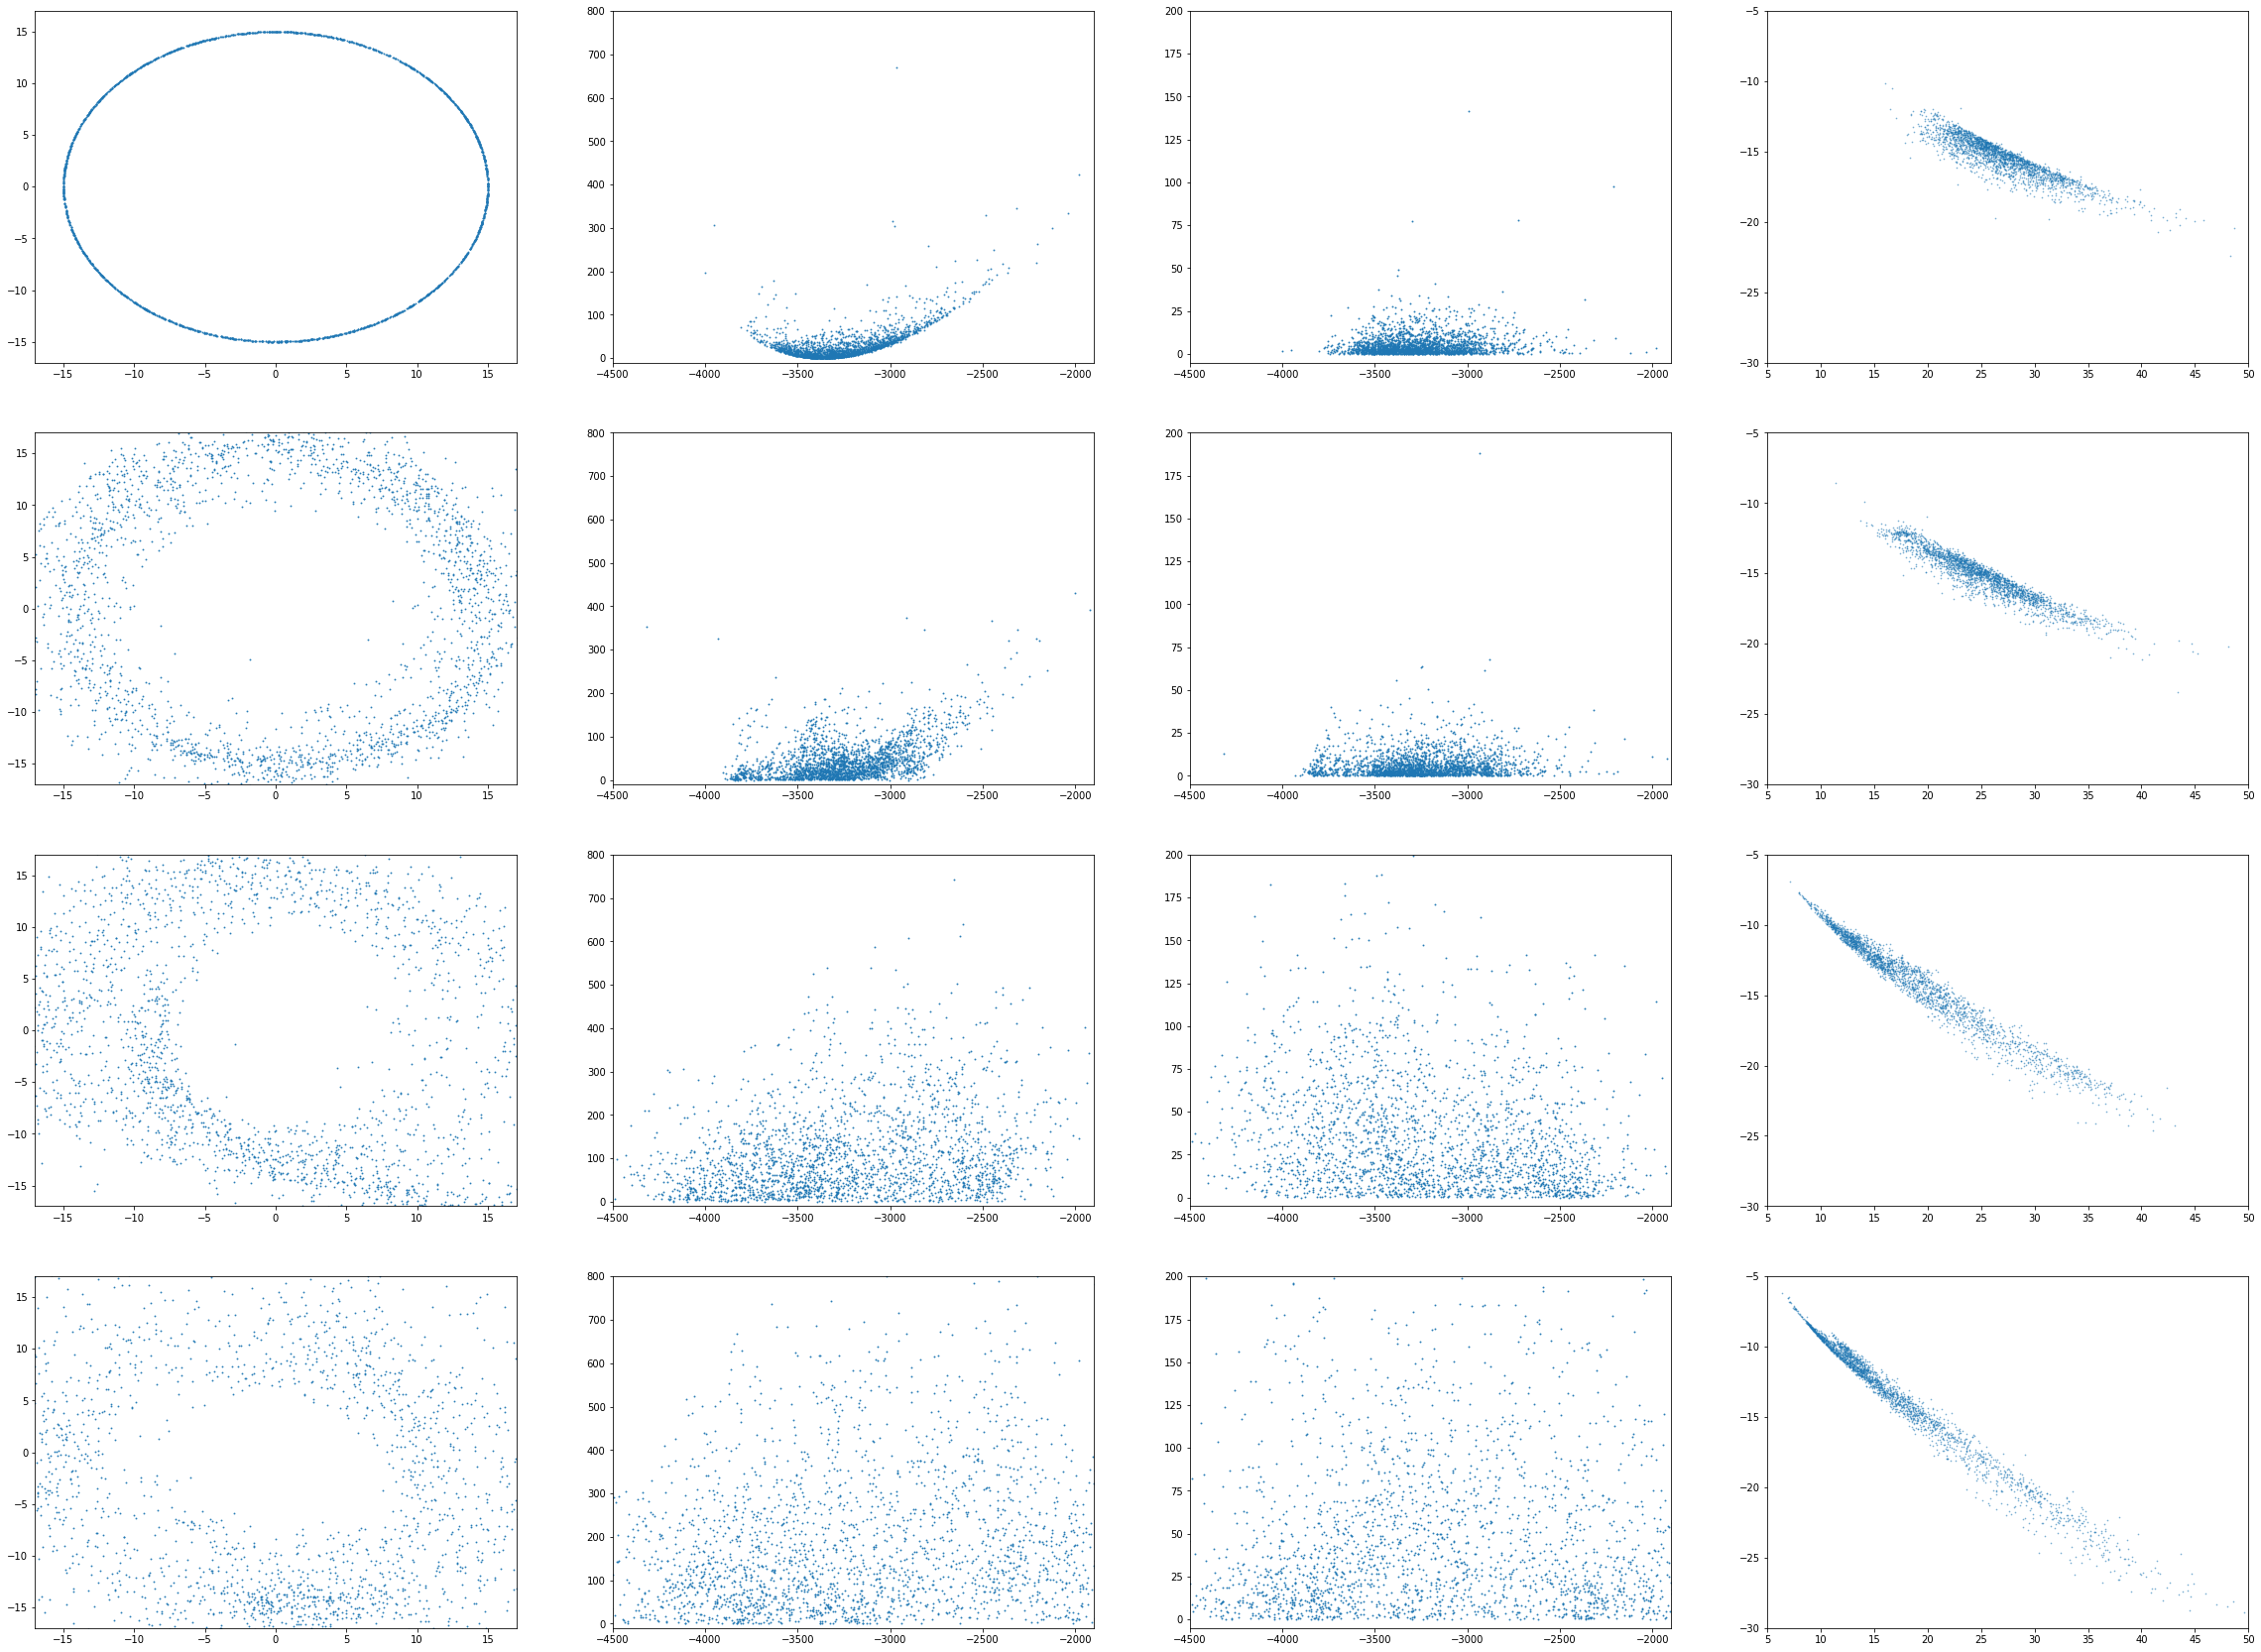

In [73]:

fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(40,30))
axs[0,0].scatter(newX_15, newY_15, s=0.8,alpha=0.9)
axs[0,0].axis([-17,17,-17,17])
axs[0,1].scatter(newJphi_15, newJr_15,s=0.9,alpha=0.8)
axs[0,1].axis([-4500,-1900,-10,800])
axs[0,2].scatter(newJphi_15, newJz_15,s=0.9,alpha=0.9)
axs[0,2].axis([-4500,-1900,-5, 200])
axs[0,3].scatter(newOz_15, newOphi_15,s=0.5,alpha=0.5)
axs[0,3].axis([5,50,-30,-5])

axs[1,0].scatter(newX2_15, newY2_15,s=0.8,alpha=0.9)
axs[1,0].axis([-17,17,-17,17])
axs[1,1].scatter(newJphi2_15, newJr2_15,s=0.9,alpha=0.9)
axs[1,1].axis([-4500,-1900,-10,800])
axs[1,2].scatter(newJphi2_15, newJz2_15,s=0.9,alpha=0.9)
axs[1,2].axis([-4500,-1900,-5, 200])
axs[1,3].scatter(newOz2_15, newOphi2_15,s=0.5,alpha=0.5)
axs[1,3].axis([5,50,-30,-5])

axs[2,0].scatter(newX3_15, newY3_15,s=0.8,alpha=0.9)
axs[2,0].axis([-17,17,-17,17])
axs[2,1].scatter(newJphi3_15, newJr3_15,s=0.9,alpha=0.9)
axs[2,1].axis([-4500,-1900,-10,800])
axs[2,2].scatter(newJphi3_15, newJz3_15,s=0.9,alpha=0.9)
axs[2,2].axis([-4500,-1900,-5, 200])
axs[2,3].scatter(newOz3_15, newOphi3_15,s=0.5,alpha=0.5)
axs[2,3].axis([5,50,-30,-5])

axs[3,0].scatter(newX4_15, newY4_15,s=0.8,alpha=0.9)
axs[3,0].axis([-17,17,-17,17])
axs[3,1].scatter(newJphi4_15, newJr4_15,s=0.9,alpha=0.9)
axs[3,1].axis([-4500,-1900,-10,800])
axs[3,2].scatter(newJphi4_15, newJz4_15,s=0.9,alpha=0.9)
axs[3,2].axis([-4500,-1900,-5, 200])
axs[3,3].scatter(newOz4_15, newOphi4_15,s=0.5,alpha=0.5)
axs[3,3].axis([5,50,-30,-5])